In [1]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy as np
def Display(count,size, FileName,**kwargs):
    """ This Function is to Display the data sets in scatter plot 
    
    Syntax:
    
    
    Disply(size,Dataset_Name = Dataset_value ,...)
    Size will be around 0.1 to 20
    DataSetName is the Name of the DataSet which will be displayed as legend
    Dataset_value in numpy Array in 2D
    """
    
    fig = plt.figure(count, figsize=(15,12))
    ax1 = fig.add_subplot(111)
    
    #print("formal arg:", farg)
    #for key in kwargs:
    colour = ['r','g','b','orange','y','cy']
    count = 0
    
    for key in kwargs:
        #print("another keyword arg: %s: %s" %(key, kwargs[key]))
        #print(kwargs)
        Lon_Lat = kwargs[key]
        Lon = Lon_Lat[:,1]
        Lat = Lon_Lat[:,0]
        ax1.scatter(Lon,Lat,label = key,color = colour[count],s=size)
        plt.xlabel('Longititude')
        plt.ylabel('Latitude')
        plt.title(FileName)
        plt.legend()
        count = count+1
        
        plt.savefig(FileName+".jpg")
        #print(count)


In [2]:
LAT_LON = genfromtxt('LAT_LON_numbers_DataSets.csv', delimiter=',')
Forest_LAT_LON = genfromtxt('LAT_LON_Forest.csv',delimiter = ',')
#Forest_With_Altitude = genfromtxt('DATA PROJECT_csv.csv',delimiter=',')
#Forest_With_Altitude.shape
from openpyxl import Workbook,load_workbook
#wb = load_workbook(filename = 'DATAPROJECT_csv1.xlsx')
wb = load_workbook(filename = 'lat_lon_alt.xlsx')
ws = wb.active
wb.get_sheet_names()
LAT = []
LON = []
ALT = []
for row in ws.iter_rows('A{}:A{}'.format(ws.min_row,ws.max_row)):
    for cell in row:
        LAT.append(cell.value)
for row in ws.iter_rows('B{}:B{}'.format(ws.min_row,ws.max_row)):
    for cell in row:
        LON.append(cell.value)
for row in ws.iter_rows('C{}:C{}'.format(ws.min_row,ws.max_row)):
    for cell in row:
        ALT.append(cell.value)
Forest_Lat_Lon_Alt = list(zip(LAT,LON,ALT))


C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\worksheet.py:495: UserWarning: Using a range string is deprecated. Use ws[range_string]
  warn("Using a range string is deprecated. Use ws[range_string]")


In [3]:
print(len(Forest_Lat_Lon_Alt))
Forest_Lat_Lon_Alt = np.array(list(set(Forest_Lat_Lon_Alt)))
Forest_Lat_Lon_Alt.shape

#print(len(Forest_Lat_Lon_Alt))

12013


(9885, 3)

In [4]:
print("Forest_Latitude_Longitude Roadmap with Dimensions and Value =",LAT_LON.shape,"\n",LAT_LON)
print("Forest_Latitude_Longitude_Altitude with Dimensions and Value =",Forest_Lat_Lon_Alt.shape,"\n",Forest_Lat_Lon_Alt)



Forest_Latitude_Longitude Roadmap with Dimensions and Value = (2451, 2) 
 [[  9.76644    77.58524  ]
 [  9.76641    77.5853   ]
 [  9.76635    77.58552  ]
 ..., 
 [  9.76582    77.73756  ]
 [  9.7038563  77.7161977]
 [  9.7658231  77.7375615]]
Forest_Latitude_Longitude_Altitude with Dimensions and Value = (9885, 3) 
 [[   9.76885   77.6219   911.36   ]
 [   9.74163   77.62968  911.18   ]
 [   9.77331   77.59734  932.83   ]
 ..., 
 [   9.75709   77.65314  625.96   ]
 [   9.76018   77.60395  625.89   ]
 [   9.77381   77.64456  368.46   ]]


In [5]:
Altitude_Distribution = [Forest_Lat_Lon_Alt[i][2] for i in range(Forest_Lat_Lon_Alt.shape[0])]


In [6]:
len(Altitude_Distribution)

9885

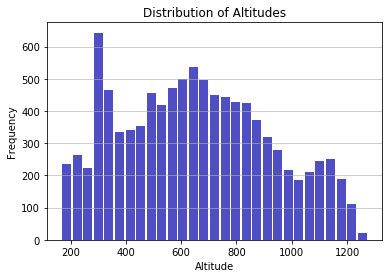

In [7]:
plt.hist(x=Altitude_Distribution, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.title('Distribution of Altitudes')
plt.savefig("Altitude_ranges.jpg")

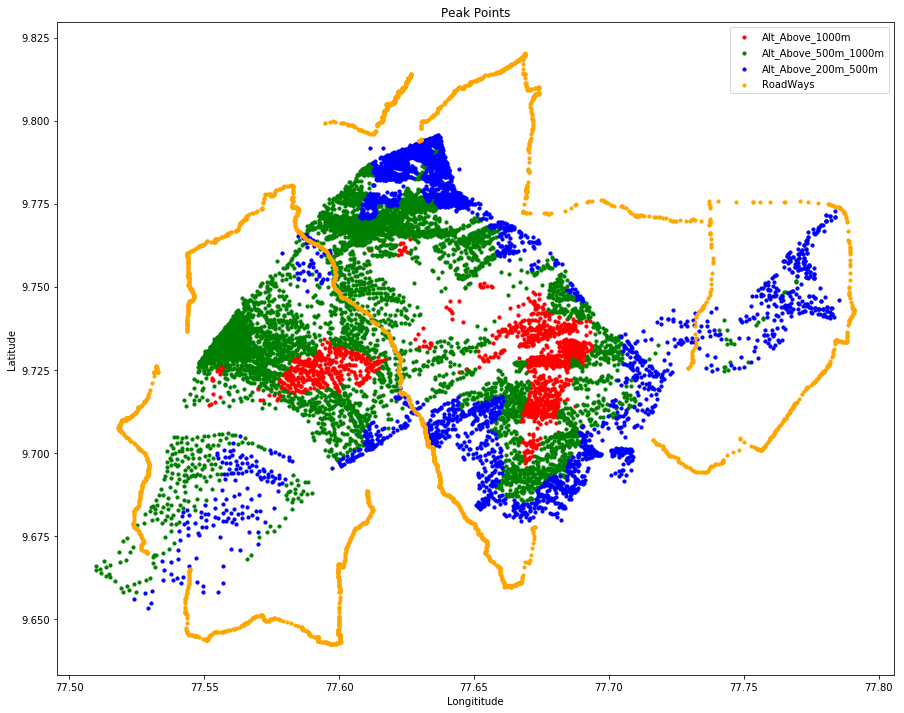

In [8]:
Alt_Above_1000 = []
Alt_Above_500_1000 =[]
Alt_Above_200_500 = []
for i in range(Forest_Lat_Lon_Alt.shape[0]):
    if(Forest_Lat_Lon_Alt[i,2]>1000):
        Alt_Above_1000.append(Forest_Lat_Lon_Alt[i])
    if((Forest_Lat_Lon_Alt[i,2]>500)and(Forest_Lat_Lon_Alt[i,2]<1000)):
        Alt_Above_500_1000.append(Forest_Lat_Lon_Alt[i])
    if((Forest_Lat_Lon_Alt[i,2]>200)and(Forest_Lat_Lon_Alt[i,2]<500)):
        Alt_Above_200_500.append(Forest_Lat_Lon_Alt[i])
Alt_Above_1000 = np.array(Alt_Above_1000)
Alt_Above_500_1000 = np.array(Alt_Above_500_1000)
Alt_Above_200_500 = np.array(Alt_Above_200_500)
Display(count =1,size = 10,FileName = "Peak Points",Alt_Above_1000m = Alt_Above_1000,Alt_Above_500m_1000m = Alt_Above_500_1000,Alt_Above_200m_500m = Alt_Above_200_500,RoadWays = LAT_LON)

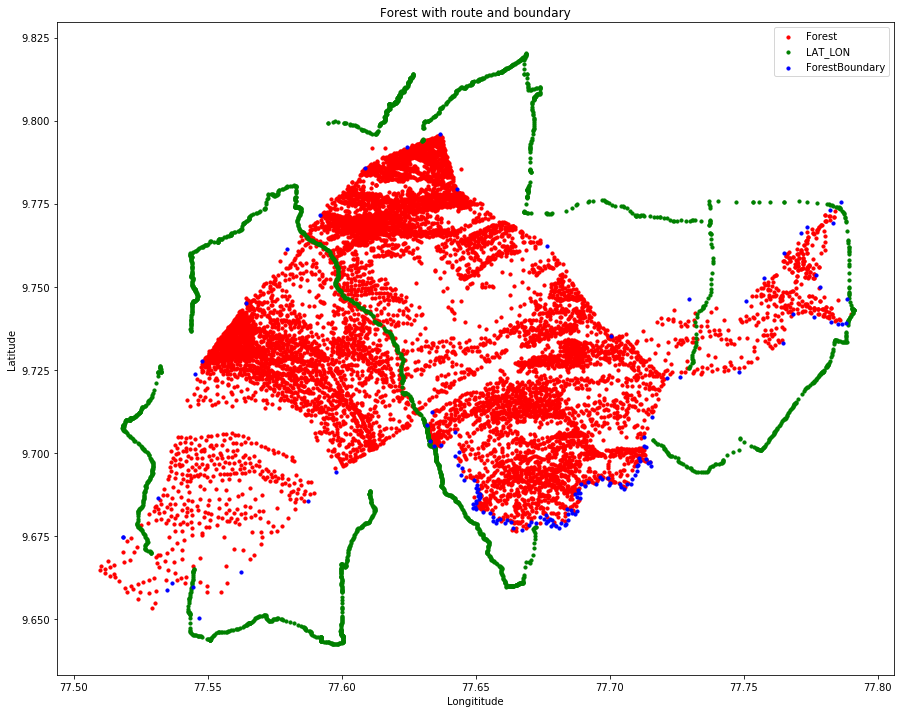

In [9]:
Display(count =1,size=10,FileName = "Forest with route and boundary",Forest = Forest_Lat_Lon_Alt,LAT_LON = LAT_LON,ForestBoundary = Forest_LAT_LON)

In [10]:
print(LAT_LON.shape)
print(Forest_Lat_Lon_Alt.shape)
print(Forest_LAT_LON.shape)

(2451, 2)
(9885, 3)
(142, 2)


# kmeans = KMeans(n_clusters=int(LAT_LON.shape[0]),init = 'k-means++', random_state=1).fit(LAT_LON)
center=kmeans.cluster_centers_
labels = kmeans.labels_
print(center.shape)
labels.shape
#metrics.silhouette_score(LAT_LON, labels, metric='euclidean')

# Clustering LAT_LON

In [10]:
LAT_LON.shape

(2451, 2)

### Fitting LATLON with Kernal Size as Center

In [12]:
from sklearn.cluster import KMeans   #For K Means Clustering
from sklearn import metrics          #For Metrics Score determination  
kmeans = KMeans(n_clusters=int(LAT_LON.shape[0]),init = 'k-means++', random_state=1).fit(LAT_LON)
center=kmeans.cluster_centers_
True_LAT_LON = [list(j) for j in center if j in LAT_LON]
True_LAT_LON = np.array(True_LAT_LON)
print("Centers:",center.shape,"\nTrue LAT LON:",True_LAT_LON.shape,"\nLATLON_Shapes:",LAT_LON.shape)
labels = kmeans.labels_
#print(center.shape)
for i in range(2,5):
    kmeans = KMeans(n_clusters=int(center.shape[0]/i),init = 'k-means++', random_state=1).fit(LAT_LON)
    center=kmeans.cluster_centers_
    labels = kmeans.labels_
    True_LAT_LON = [list(j) for j in center if j in LAT_LON]
    True_LAT_LON = np.array(True_LAT_LON)
    print(i,"Kernal Shape:",center.shape)
    print(i,"True Center counts",True_LAT_LON.shape)
#print(center.shape)
labels


Centers: (2451, 2) 
True LAT LON: (2451, 2) 
LATLON_Shapes: (2451, 2)
2 Kernal Shape: (1225, 2)
2 True Center counts (676, 2)
3 Kernal Shape: (408, 2)
3 True Center counts (52, 2)
4 Kernal Shape: (102, 2)
4 True Center counts (3, 2)


array([ 58,  58,  58, ..., 100,  41, 100])

In [13]:
print(len(list(set(labels))))
metrics.pairwise_distances(center)

102


array([[ 0.        ,  0.17618305,  0.20885037, ...,  0.22396921,
         0.05991705,  0.24756711],
       [ 0.17618305,  0.        ,  0.09982097, ...,  0.04989924,
         0.13411941,  0.11035456],
       [ 0.20885037,  0.09982097,  0.        , ...,  0.12237989,
         0.19288739,  0.04390476],
       ..., 
       [ 0.22396921,  0.04989924,  0.12237989, ...,  0.        ,
         0.1773625 ,  0.11397555],
       [ 0.05991705,  0.13411941,  0.19288739, ...,  0.1773625 ,
         0.        ,  0.22493963],
       [ 0.24756711,  0.11035456,  0.04390476, ...,  0.11397555,
         0.22493963,  0.        ]])

### Fitting Centers with Kernal Size as Center

In [14]:
from sklearn.cluster import KMeans   #For K Means Clustering
from sklearn import metrics          #For Metrics Score determination  
kmeans = KMeans(n_clusters=int(LAT_LON.shape[0]),init = 'k-means++', random_state=1).fit(LAT_LON)
center=kmeans.cluster_centers_
True_LAT_LON = [list(j) for j in center if j in LAT_LON]
True_LAT_LON = np.array(True_LAT_LON)
print("Centers:",center.shape,"\nTrue LAT LON:",True_LAT_LON.shape,"\nLATLON_Shapes:",LAT_LON.shape)
labels = kmeans.labels_
#print(center.shape)
for i in range(2,5):
    kmeans = KMeans(n_clusters=int(center.shape[0]/i),init = 'k-means++', random_state=1).fit(center)
    center=kmeans.cluster_centers_
    labels = kmeans.labels_
    True_LAT_LON = [list(j) for j in center if j in LAT_LON]
    True_LAT_LON = np.array(True_LAT_LON)
    print(i,"Kernal Shape:",center.shape)
    print(i,"True Center counts",True_LAT_LON.shape)
#print(center.shape)
labels

Centers: (2451, 2) 
True LAT LON: (2451, 2) 
LATLON_Shapes: (2451, 2)
2 Kernal Shape: (1225, 2)
2 True Center counts (678, 2)
3 Kernal Shape: (408, 2)
3 True Center counts (58, 2)
4 Kernal Shape: (102, 2)
4 True Center counts (1, 2)


array([ 22,  48,  25,  38,  51,  86,  20,  75,  85,  30,   4,  80,  17,
        47,  52,  41, 100,  61,  78,  65,   2,  23,  16,  74,  24,  98,
        64,  94,  57,   5,   7,  58,  93,  63,  32,  89,  66,   1,  84,
        42,  31,   0,  67,  88,  59,  15,  19,  54,  35,  37,  95,  55,
        34,  82,  43,  72,  50,   6,  91,  71,  77,  38,  92,   3,  20,
        62,  79,  46,  83,  25,  45,  69,  11,  10,  26,   9,  59,  32,
         8,  28,  36,  76,  90,  60,  99,  21,  68,  13,  18,  61,  40,
        29,  42,  27,  97,  45,  73,  49,  44,   3,  53,  48,  37,  52,
        39,  83,  33,  92,  43,  56,  47,  44,  54,  34,  72,  87,   6,
        12,  60,   0,  25,  79,   2,   8,  70,  75,  69,  49,  96,  15,
        91,  42, 101,  26,  31,  18,  85,   1,  51,  82,  50,  59,  19,
        90,  20,  42,  14,  58,   7,  77,  55,  94,  28,  66,  36,  97,
        73,  89,  57,  80,  16,  41,  37,  78,  68,  15,  93,  41,  64,
        88,  62,  81,  23,  22,  84,  14,  30,  47,  86,  21,  5

### Fitting LATLON with Kernel as LaT_Lon

In [15]:
from sklearn.cluster import KMeans   #For K Means Clustering
from sklearn import metrics          #For Metrics Score determination  
kmeans = KMeans(n_clusters=int(LAT_LON.shape[0]),init = 'k-means++', random_state=1).fit(LAT_LON)
center=kmeans.cluster_centers_
True_LAT_LON = [list(j) for j in center if j in LAT_LON]
True_LAT_LON = np.array(True_LAT_LON)
print("Centers:",center.shape,"\nTrue LAT LON:",True_LAT_LON.shape,"\nLATLON_Shapes:",LAT_LON.shape)
labels = kmeans.labels_
#print(center.shape)
for i in range(2,5):
    kmeans = KMeans(n_clusters=int(LAT_LON.shape[0]/i),init = 'k-means++', random_state=1).fit(LAT_LON)
    center=kmeans.cluster_centers_
    labels = kmeans.labels_
    True_LAT_LON = [list(j) for j in center if j in LAT_LON]
    True_LAT_LON = np.array(True_LAT_LON)
    print(i,"Kernal Shape:",center.shape)
    print(i,"True Center counts",True_LAT_LON.shape)
#print(center.shape)
#labels

Centers: (2451, 2) 
True LAT LON: (2451, 2) 
LATLON_Shapes: (2451, 2)
2 Kernal Shape: (1225, 2)
2 True Center counts (676, 2)
3 Kernal Shape: (817, 2)
3 True Center counts (265, 2)
4 Kernal Shape: (612, 2)
4 True Center counts (139, 2)


### Fitting Cluster with Kernal size as LATLON

In [16]:
from sklearn.cluster import KMeans   #For K Means Clustering
from sklearn import metrics          #For Metrics Score determination  
kmeans = KMeans(n_clusters=int(LAT_LON.shape[0]),init = 'k-means++', random_state=1).fit(LAT_LON)
center=kmeans.cluster_centers_
True_LAT_LON = [list(j) for j in center if j in LAT_LON]
True_LAT_LON = np.array(True_LAT_LON)
print("Centers:",center.shape,"\nTrue LAT LON:",True_LAT_LON.shape,"\nLATLON_Shapes:",LAT_LON.shape)
labels = kmeans.labels_
#print(center.shape)
for i in range(2,5):
    kmeans = KMeans(n_clusters=int(LAT_LON.shape[0]/i),init = 'k-means++', random_state=1).fit(center)
    center=kmeans.cluster_centers_
    labels = kmeans.labels_
    True_LAT_LON = [list(j) for j in center if j in LAT_LON]
    True_LAT_LON = np.array(True_LAT_LON)
    print(i,"Kernal Shape:",center.shape)
    print(i,"True Center counts",True_LAT_LON.shape)
#print(center.shape)

Centers: (2451, 2) 
True LAT LON: (2451, 2) 
LATLON_Shapes: (2451, 2)
2 Kernal Shape: (1225, 2)
2 True Center counts (678, 2)
3 Kernal Shape: (817, 2)
3 True Center counts (319, 2)
4 Kernal Shape: (612, 2)
4 True Center counts (158, 2)


### Final LAT_LON value

In [11]:
from sklearn.cluster import KMeans   #For K Means Clustering
from sklearn import metrics          #For Metrics Score determination  
kmeans = KMeans(n_clusters=int(LAT_LON.shape[0]),init = 'k-means++', random_state=1).fit(LAT_LON)
center=kmeans.cluster_centers_
True_LAT_LON = [list(j) for j in center if j in LAT_LON]
True_LAT_LON = np.array(True_LAT_LON)
print("Centers:",center.shape,"\nTrue LAT LON:",True_LAT_LON.shape,"\nLATLON_Shapes:",LAT_LON.shape)
labels = kmeans.labels_
#print(center.shape)
for i in range(2,4):
    kmeans = KMeans(n_clusters=int(LAT_LON.shape[0]/i),init = 'k-means++', random_state=1).fit(center)
    center=kmeans.cluster_centers_
    labels = kmeans.labels_
    True_LAT_LON = [list(j) for j in center if j in LAT_LON]
    True_LAT_LON = np.array(True_LAT_LON)
    print(i,"Kernal Shape:",center.shape)
    print(i,"True Center counts",True_LAT_LON.shape)

Centers: (2451, 2) 
True LAT LON: (2451, 2) 
LATLON_Shapes: (2451, 2)
2 Kernal Shape: (1225, 2)
2 True Center counts (678, 2)
3 Kernal Shape: (817, 2)
3 True Center counts (319, 2)


In [12]:
True_LAT_LON.shape

(319, 2)

# CLUSTERING  LAT_LON_ALT

In [19]:
Display(count =1,size=10,FileName = "Forest with route and boundary",ForestBoundary  = Forest_LAT_LON,Forest = center_alt)

NameError: name 'center_alt' is not defined

#### Fitting Cluster of Centers with Kernal size of Number of Cluster Centers

2 Kernal Shape: (9885, 3)
2 True Center counts 9885
3 Kernal Shape: (4942, 3)
3 True Center counts 3004
4 Kernal Shape: (1647, 3)
4 True Center counts 249
5 Kernal Shape: (411, 3)
5 True Center counts 7


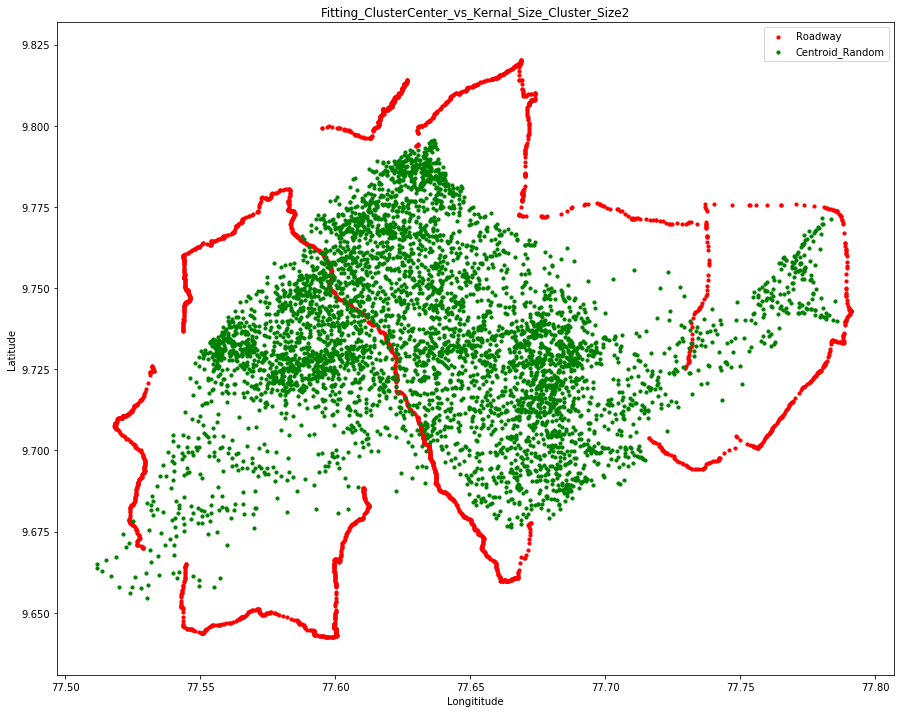

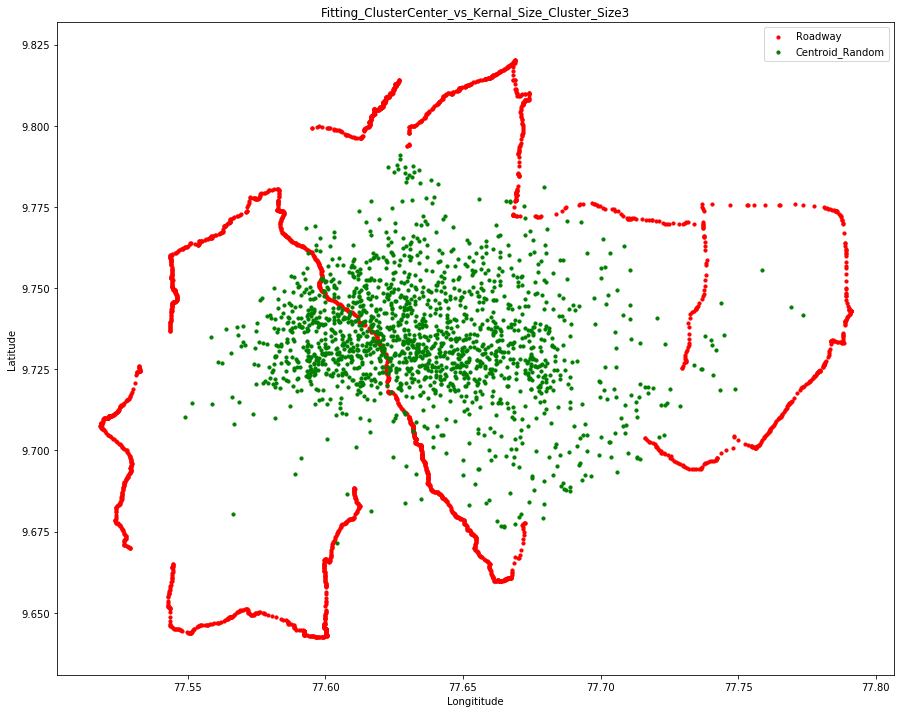

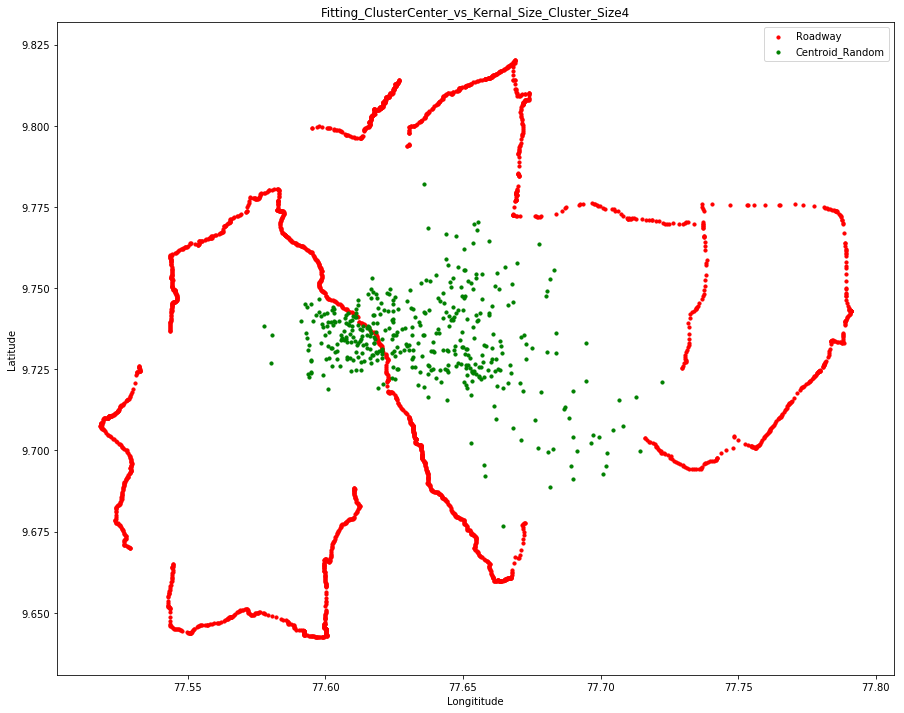

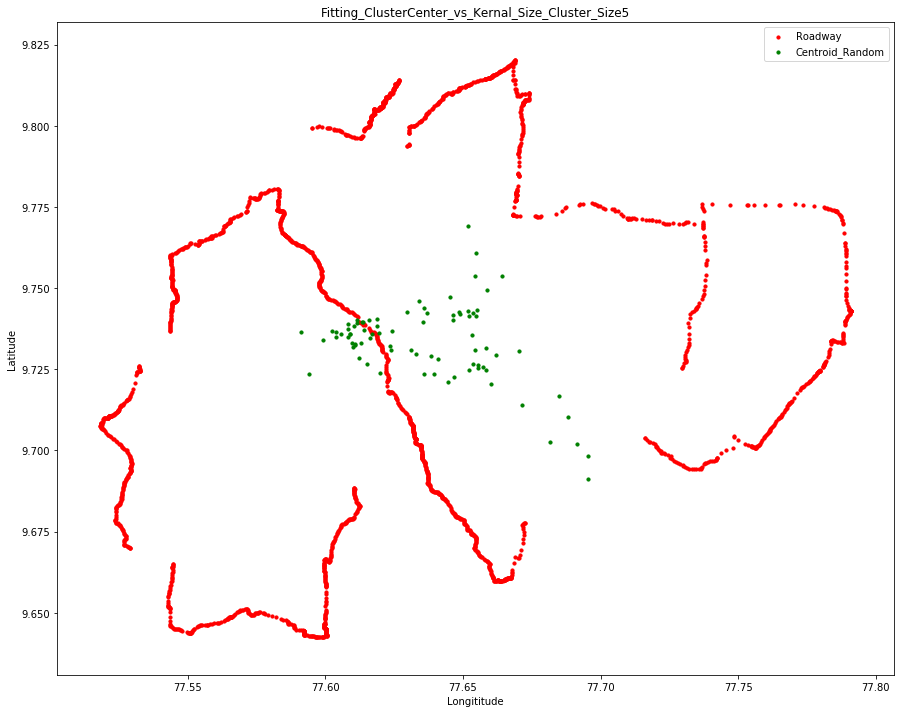

In [20]:
from sklearn.cluster import KMeans   #For K Means Clustering
from sklearn import metrics          #For Metrics Score determination  

kmeans_alt = KMeans(n_clusters=int(Forest_Lat_Lon_Alt.shape[0]),init = 'k-means++', random_state=1).fit(Forest_Lat_Lon_Alt[:,0:3])
center_alt=kmeans_alt.cluster_centers_
labels_alt = kmeans_alt.labels_

for i in range(2,6):
    a = [j for j in center_alt if j in Forest_Lat_Lon_Alt]
    print(i,"Kernal Shape:",center_alt.shape)
    print(i,"True Center counts",len(a))
    kmeans_alt = KMeans(n_clusters=int(center_alt.shape[0]/i),init = 'k-means++', random_state=1).fit(center_alt)
    #print((center_alt.shape))
    center_alt=kmeans_alt.cluster_centers_
    labels_alt = kmeans_alt.labels_
    Display(count =i,size=10,FileName = "Fitting_ClusterCenter_vs_Kernal_Size_Cluster_Size" + str(i),Roadway = LAT_LON,Centroid_Random = center_alt)
    

2 Kernal Shape: (9885, 3)
2 True Center counts 9885
3 Kernal Shape: (4943, 3)
3 True Center counts 3027
4 Kernal Shape: (1648, 3)
4 True Center counts 255
5 Kernal Shape: (413, 3)
5 True Center counts 7


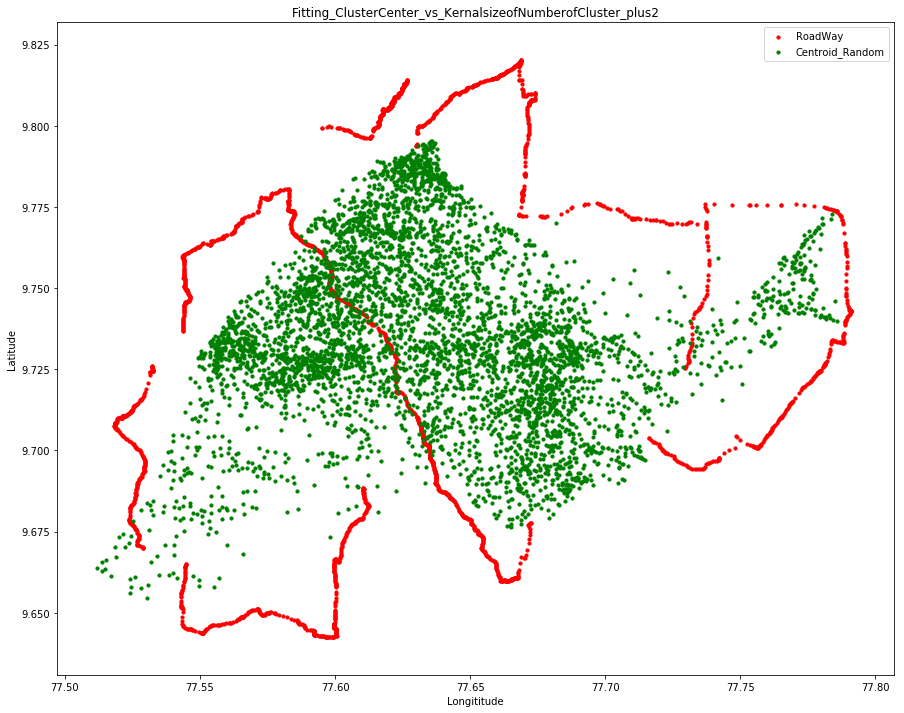

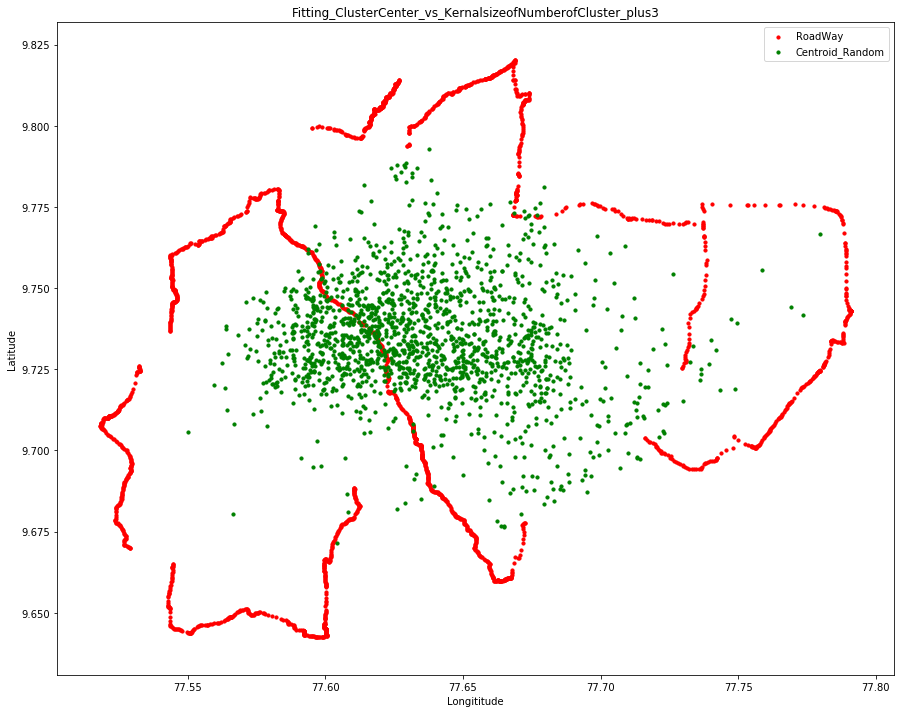

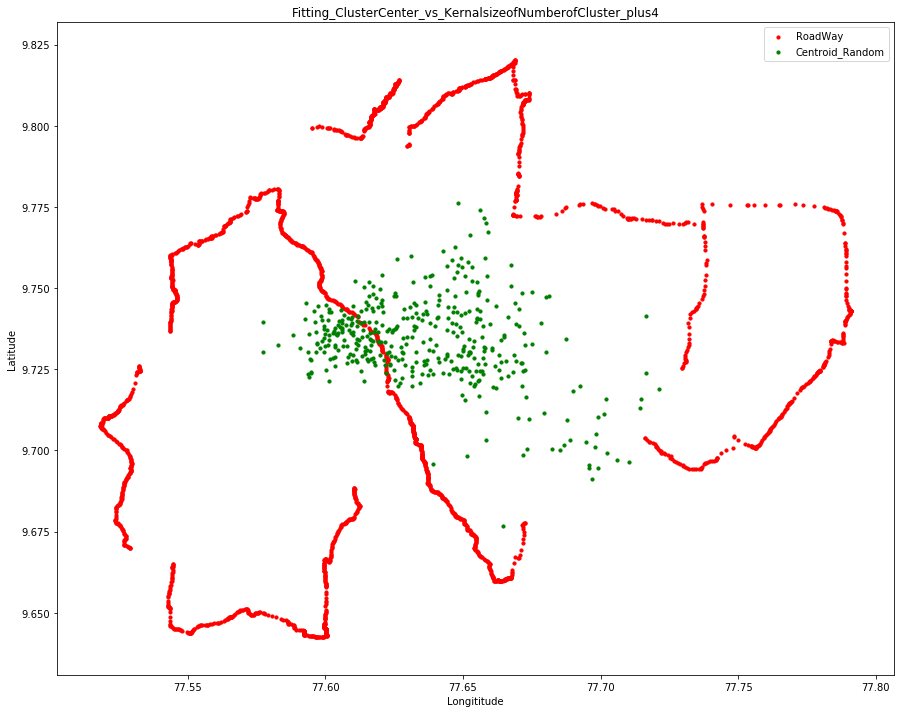

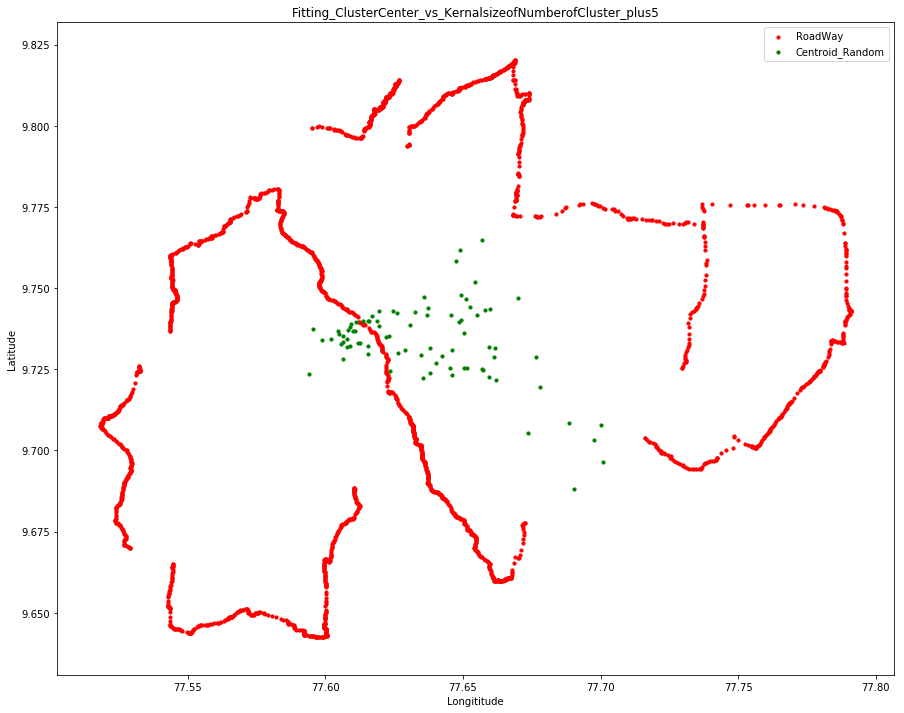

In [21]:
from sklearn.cluster import KMeans   #For K Means Clustering
from sklearn import metrics          #For Metrics Score determination  

kmeans_alt = KMeans(n_clusters=int(Forest_Lat_Lon_Alt.shape[0]),init = 'k-means++', random_state=1).fit(Forest_Lat_Lon_Alt[:,0:3])
center_alt=kmeans_alt.cluster_centers_
labels_alt = kmeans_alt.labels_



for i in range(2,6):
    
    a = [j for j in center_alt if j in Forest_Lat_Lon_Alt]
    print(i,"Kernal Shape:",center_alt.shape)
    print(i,"True Center counts",len(a))
    kmeans_alt = KMeans(n_clusters=int(center_alt.shape[0]/i)+1,init = 'k-means++', random_state=1).fit(center_alt)
    #print("Cluster Size",center_alt.shape)
    center_alt=kmeans_alt.cluster_centers_
    labels_alt = kmeans_alt.labels_
    
    Display(count =i,size=10,FileName = "Fitting_ClusterCenter_vs_KernalsizeofNumberofCluster_plus" + str(i),RoadWay = LAT_LON,Centroid_Random = center_alt)
    

#### Fitting Entie Forest Region wrt Kernal Size of Forest Region

2 Kernal Shape: (9885, 3)
2 True Center counts 9885
3 Kernal Shape: (4942, 3)
3 True Center counts 3010
4 Kernal Shape: (3295, 3)
4 True Center counts 1340
5 Kernal Shape: (2471, 3)
5 True Center counts 751


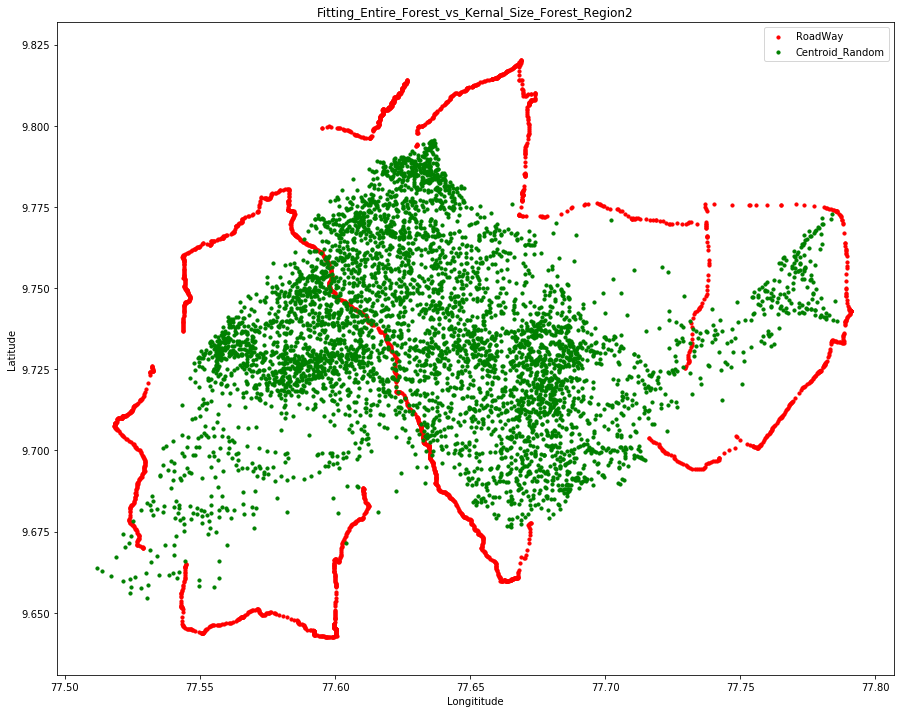

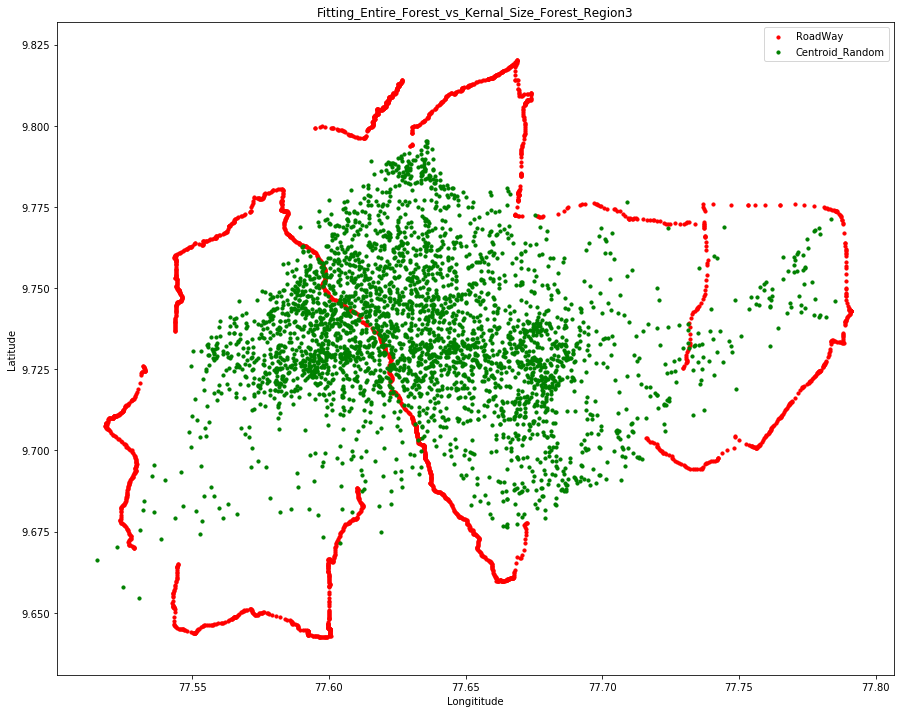

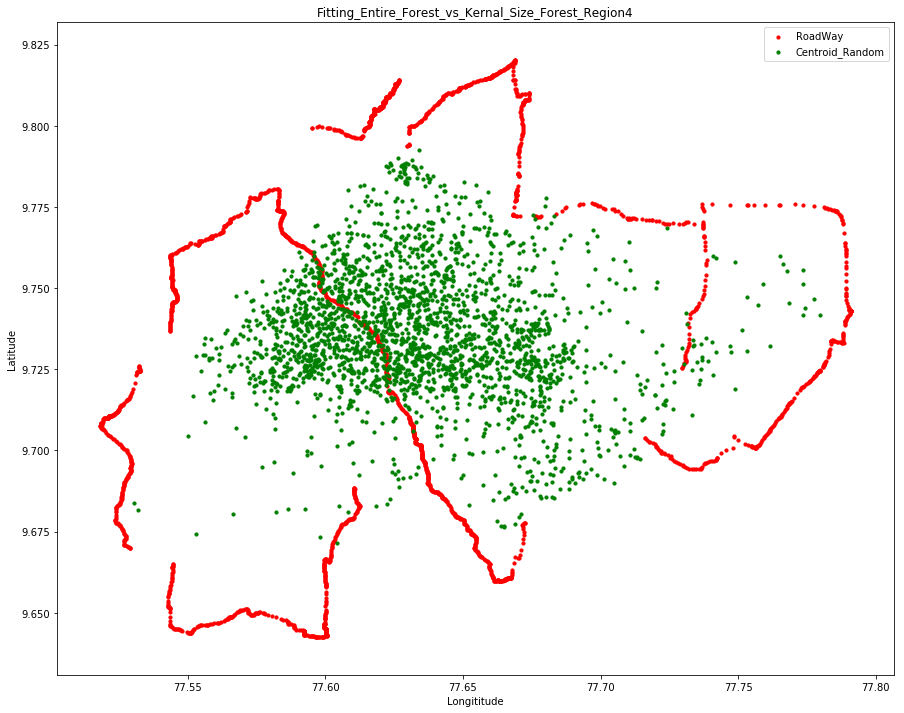

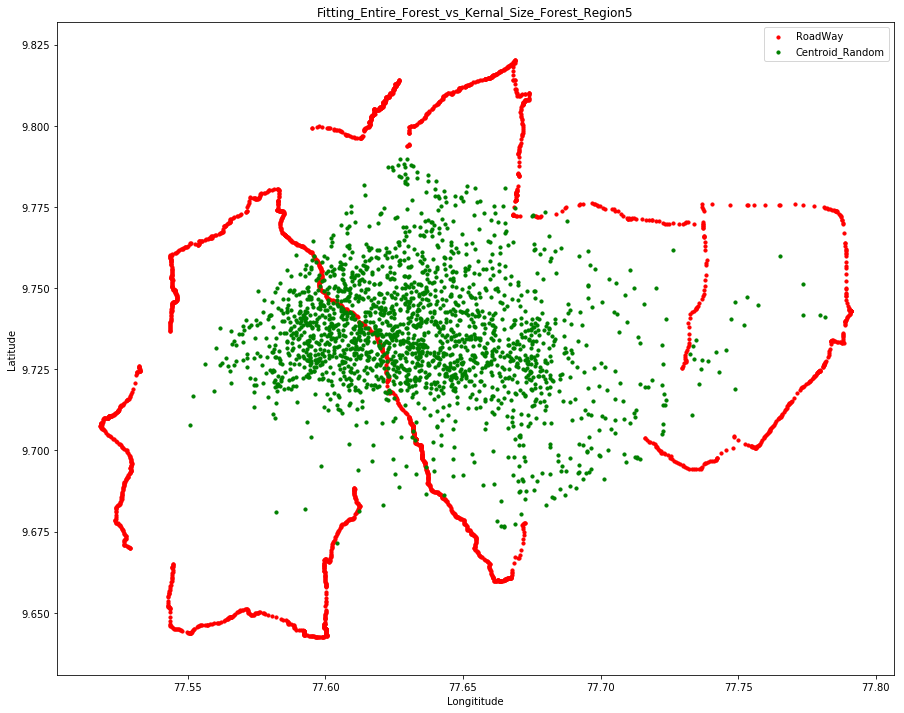

In [22]:
from sklearn.cluster import KMeans   #For K Means Clustering
from sklearn import metrics          #For Metrics Score determination  

kmeans_alt = KMeans(n_clusters=int(Forest_Lat_Lon_Alt.shape[0]),init = 'k-means++', random_state=1).fit(Forest_Lat_Lon_Alt[:,0:3])
center_alt=kmeans_alt.cluster_centers_
labels_alt = kmeans_alt.labels_
for i in range(2,6):
    a = [j for j in center_alt if j in Forest_Lat_Lon_Alt]
    print(i,"Kernal Shape:",center_alt.shape)
    print(i,"True Center counts",len(a))
    kmeans_alt = KMeans(n_clusters=int(Forest_Lat_Lon_Alt.shape[0]/i),init = 'k-means++', random_state=1).fit(Forest_Lat_Lon_Alt)
    center_alt=kmeans_alt.cluster_centers_
    labels_alt = kmeans_alt.labels_
   
    Display(count =i,size=10,FileName = "Fitting_Entire_Forest_vs_Kernal_Size_Forest_Region" + str(i),RoadWay = LAT_LON,Centroid_Random = center_alt)
    
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)  

2 Kernal Shape: (9885, 3)
2 True Center counts 9885
3 Kernal Shape: (4943, 3)
3 True Center counts 3016
4 Kernal Shape: (3296, 3)
4 True Center counts 1350
5 Kernal Shape: (2472, 3)
5 True Center counts 739


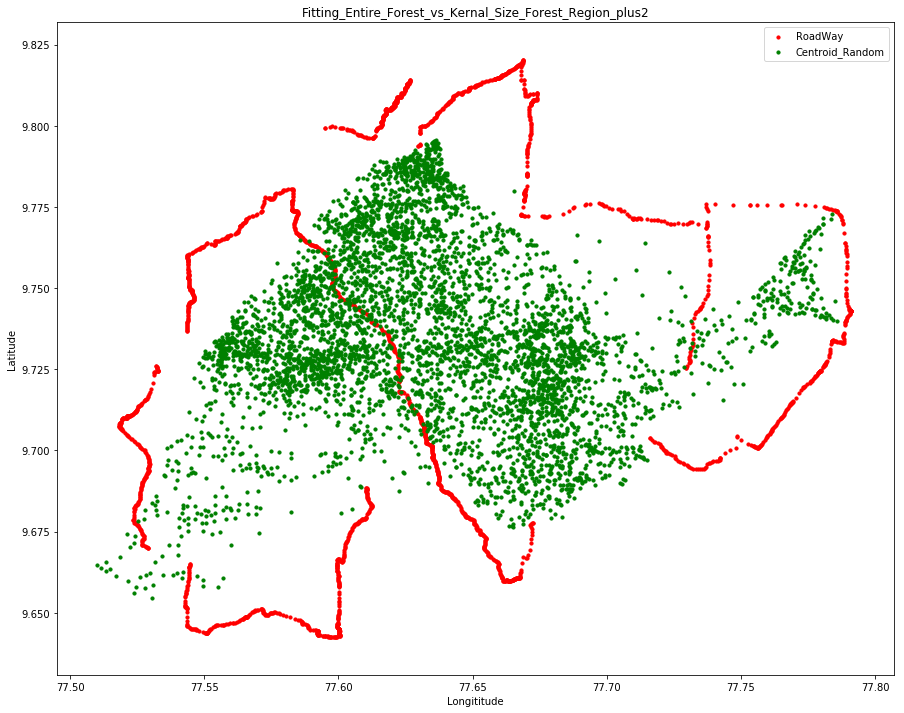

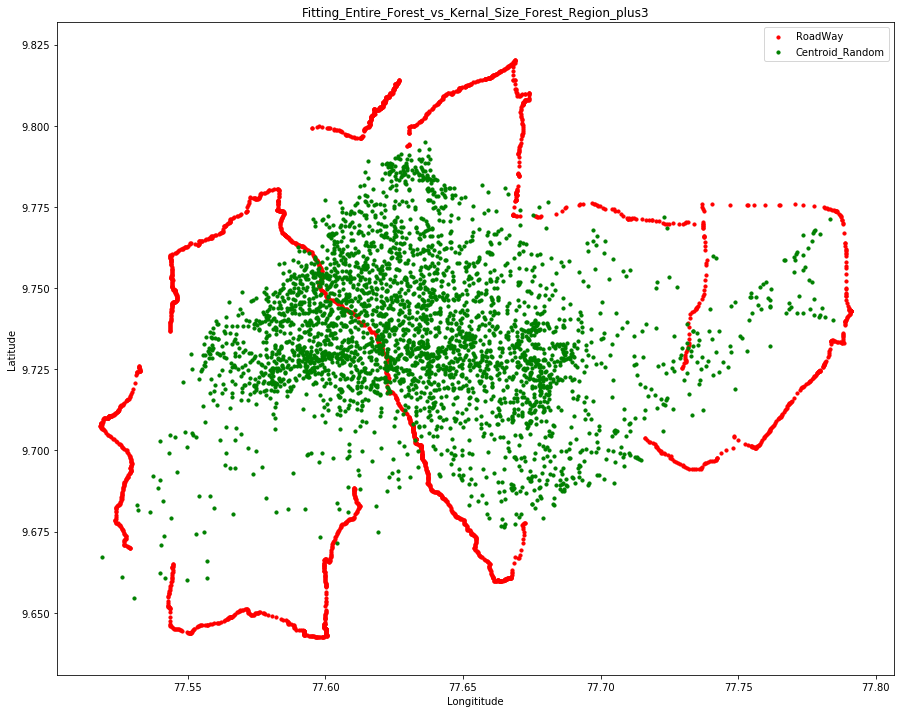

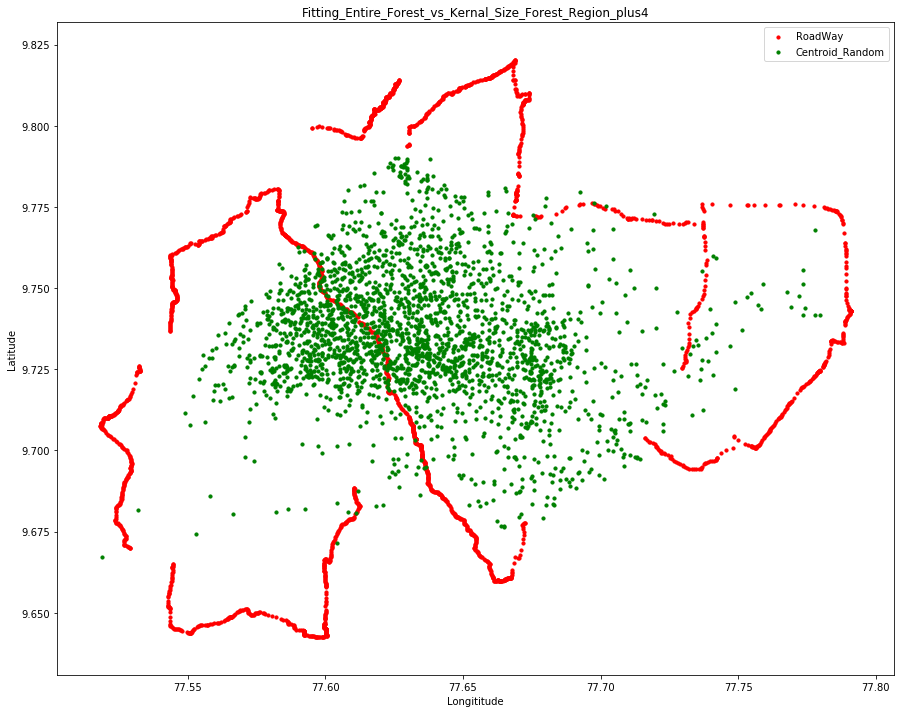

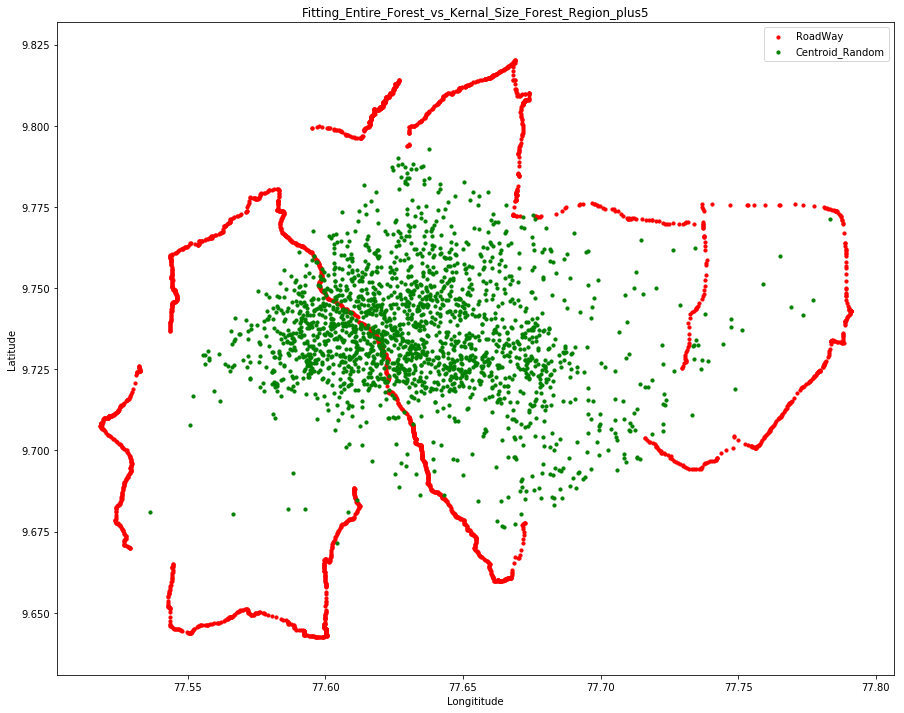

In [23]:
from sklearn.cluster import KMeans   #For K Means Clustering
from sklearn import metrics          #For Metrics Score determination  

kmeans_alt = KMeans(n_clusters=int(Forest_Lat_Lon_Alt.shape[0]),init = 'k-means++', random_state=1).fit(Forest_Lat_Lon_Alt[:,0:3])
center_alt=kmeans_alt.cluster_centers_
labels_alt = kmeans_alt.labels_
for i in range(2,6):
    a = [j for j in center_alt if j in Forest_Lat_Lon_Alt]
    print(i,"Kernal Shape:",center_alt.shape)
    print(i,"True Center counts",len(a))
    kmeans_alt = KMeans(n_clusters=int(Forest_Lat_Lon_Alt.shape[0]/i)+1,init = 'k-means++', random_state=1).fit(Forest_Lat_Lon_Alt)
    center_alt=kmeans_alt.cluster_centers_
    labels_alt = kmeans_alt.labels_
   
    Display(count =i,size=10,FileName = "Fitting_Entire_Forest_vs_Kernal_Size_Forest_Region_plus" + str(i),RoadWay = LAT_LON,Centroid_Random = center_alt)
    
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)    

#### Fitting Entire Forest wrt Kernal size of Cluster centers

2 Kernal Shape: (9885, 3)
2 True Center counts 9885
3 Kernal Shape: (4942, 3)
3 True Center counts 3010
4 Kernal Shape: (1647, 3)
4 True Center counts 312
5 Kernal Shape: (411, 3)
5 True Center counts 36


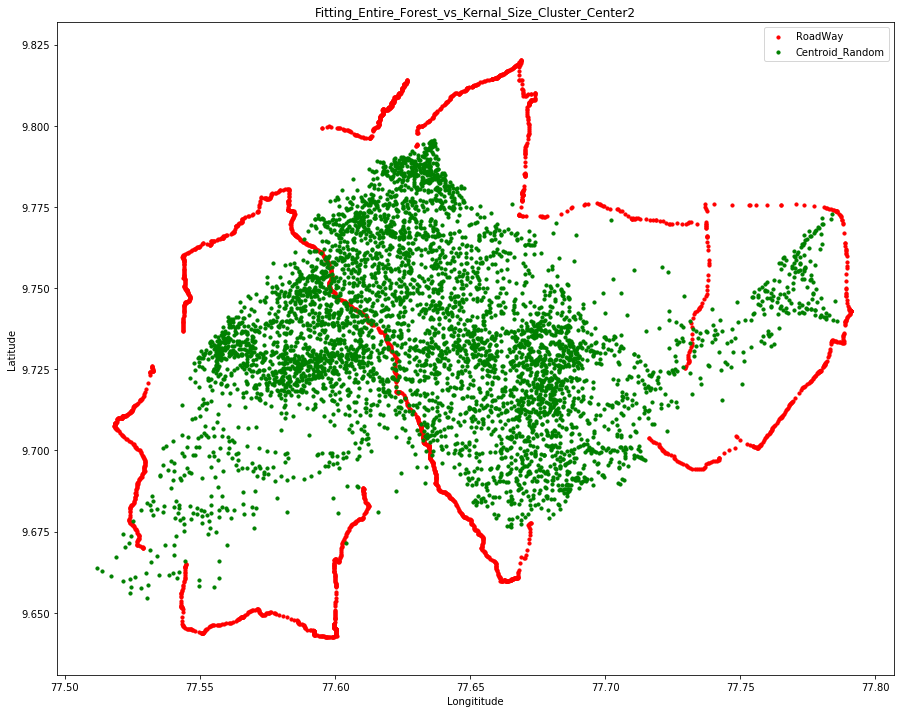

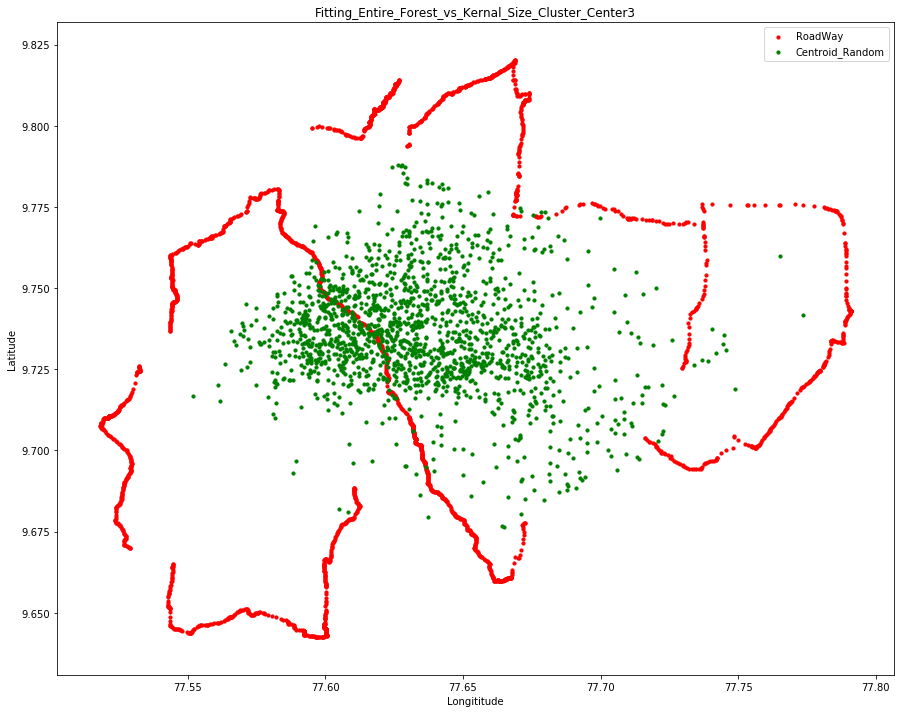

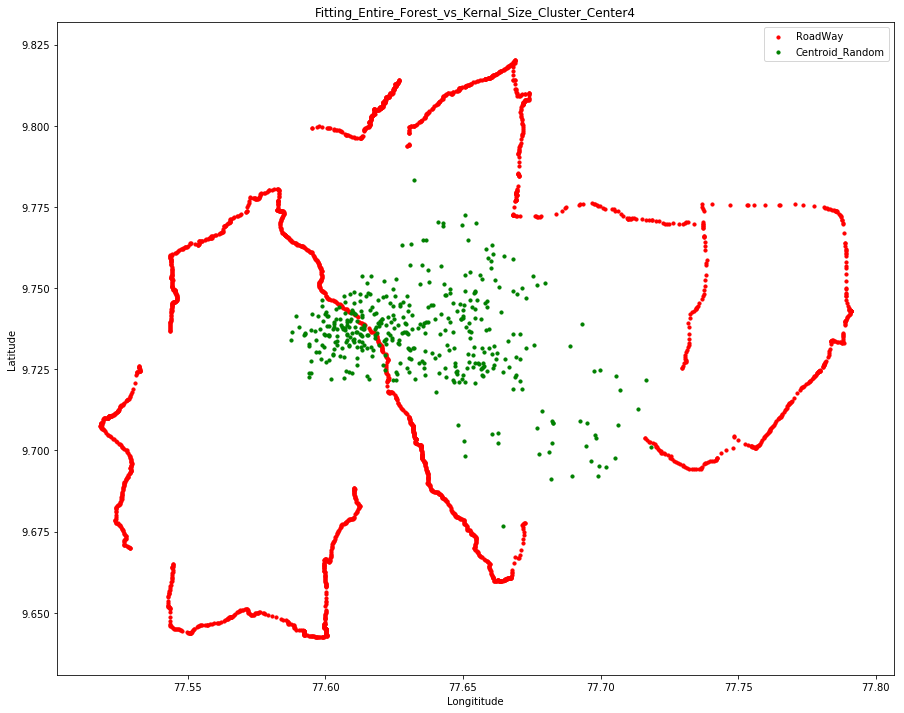

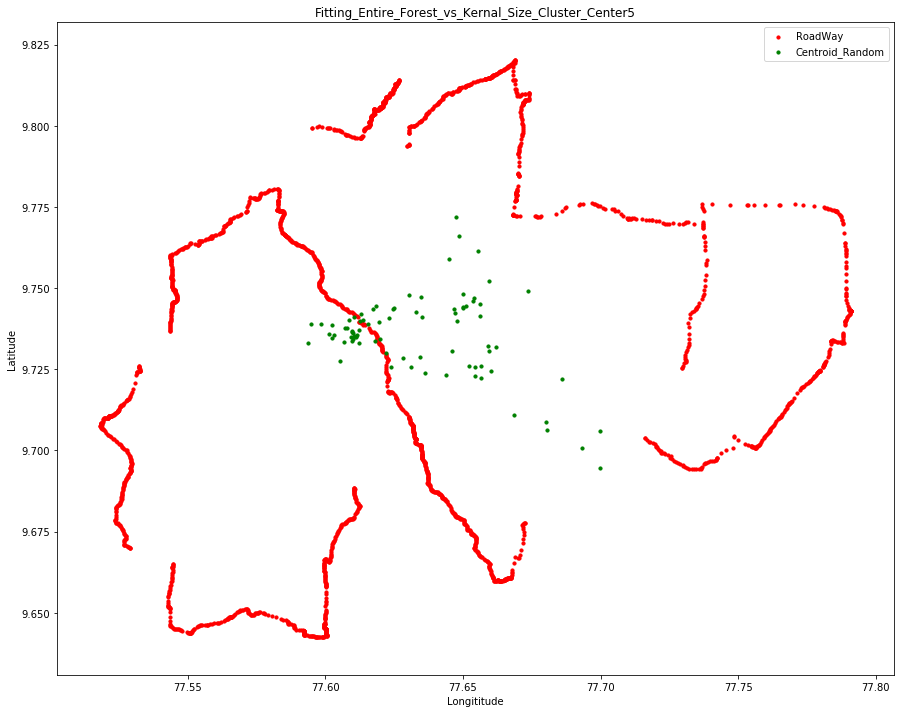

In [24]:
from sklearn.cluster import KMeans   #For K Means Clustering
from sklearn import metrics          #For Metrics Score determination  

kmeans_alt = KMeans(n_clusters=int(Forest_Lat_Lon_Alt.shape[0]),init = 'k-means++', random_state=1).fit(Forest_Lat_Lon_Alt[:,0:3])
center_alt=kmeans_alt.cluster_centers_
labels_alt = kmeans_alt.labels_

for i in range(2,6):
    a = [j for j in center_alt if j in Forest_Lat_Lon_Alt]
    print(i,"Kernal Shape:",center_alt.shape)
    print(i,"True Center counts",len(a))
    kmeans_alt = KMeans(n_clusters=int(center_alt.shape[0]/i),init = 'k-means++', random_state=1).fit(Forest_Lat_Lon_Alt[:,0:3])
    
    center_alt=kmeans_alt.cluster_centers_
    labels_alt = kmeans_alt.labels_
    Display(count =i,size=10,FileName = "Fitting_Entire_Forest_vs_Kernal_Size_Cluster_Center" + str(i),RoadWay = LAT_LON,Centroid_Random = center_alt)
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)    

2 Kernal Shape: (9885, 3)
2 True Center counts 9885
3 Kernal Shape: (4943, 3)
3 True Center counts 3016
4 Kernal Shape: (1648, 3)
4 True Center counts 325
5 Kernal Shape: (413, 3)
5 True Center counts 24


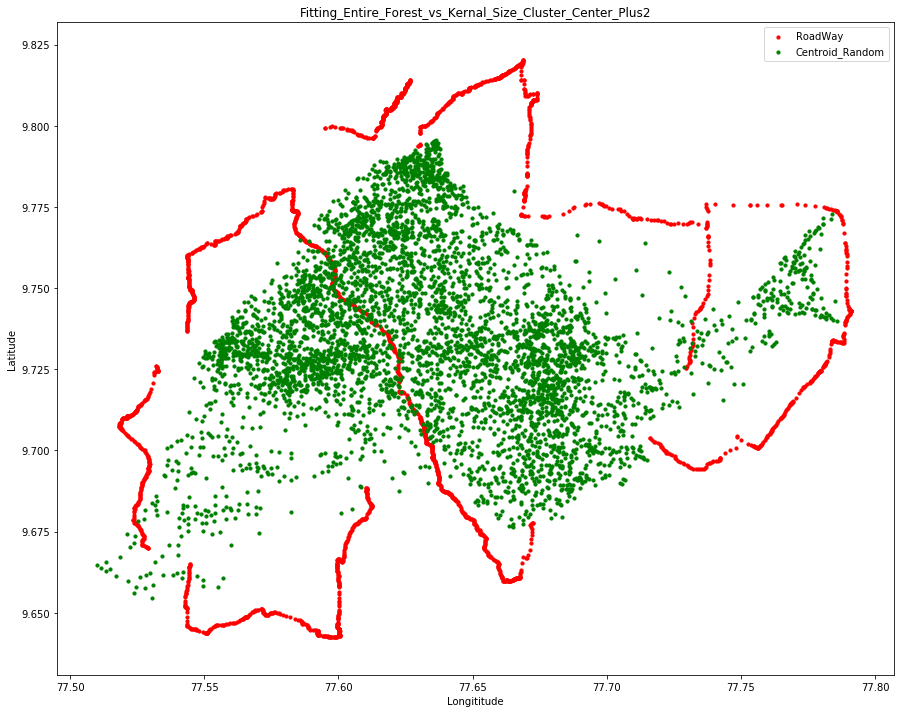

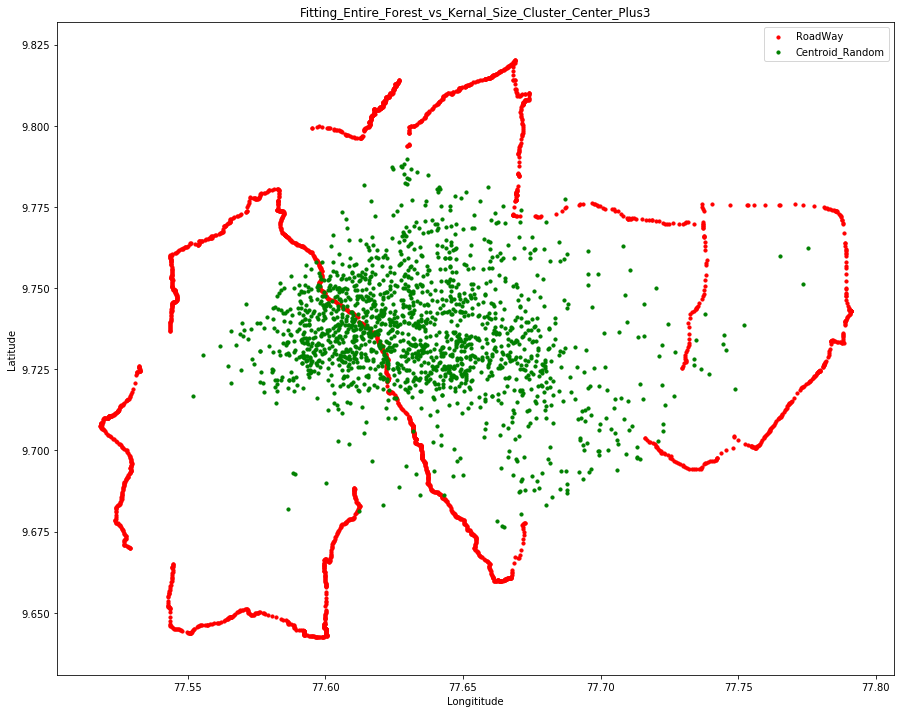

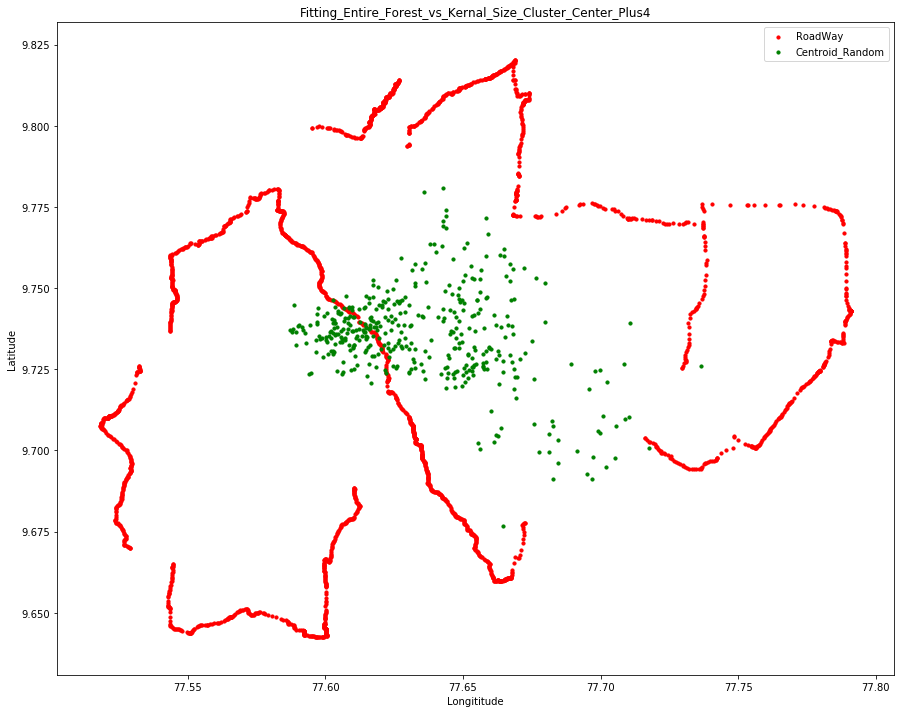

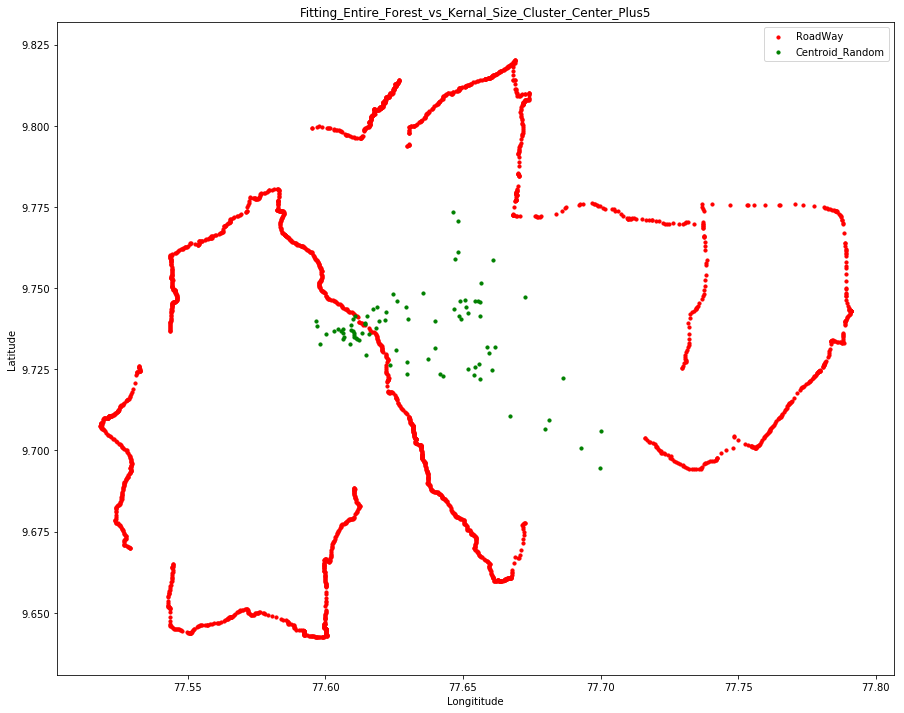

In [25]:
from sklearn.cluster import KMeans   #For K Means Clustering
from sklearn import metrics          #For Metrics Score determination  

kmeans_alt = KMeans(n_clusters=int(Forest_Lat_Lon_Alt.shape[0]),init = 'k-means++', random_state=1).fit(Forest_Lat_Lon_Alt[:,0:3])
center_alt=kmeans_alt.cluster_centers_
labels_alt = kmeans_alt.labels_
for i in range(2,6):
    a = [j for j in center_alt if j in Forest_Lat_Lon_Alt]
    print(i,"Kernal Shape:",center_alt.shape)
    print(i,"True Center counts",len(a))
    kmeans_alt = KMeans(n_clusters=int(center_alt.shape[0]/i)+1,init = 'k-means++', random_state=1).fit(Forest_Lat_Lon_Alt[:,0:3])
    
    center_alt=kmeans_alt.cluster_centers_
    labels_alt = kmeans_alt.labels_
    Display(count =i,size=10,FileName = "Fitting_Entire_Forest_vs_Kernal_Size_Cluster_Center_Plus" + str(i),RoadWay = LAT_LON,Centroid_Random = center_alt)
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)    

2 Kernal Shape: (9885, 3)
2 True Center counts 9885
3 Kernal Shape: (4942, 3)
3 True Center counts 3004
4 Kernal Shape: (3295, 3)
4 True Center counts 1432
5 Kernal Shape: (2471, 3)
5 True Center counts 754


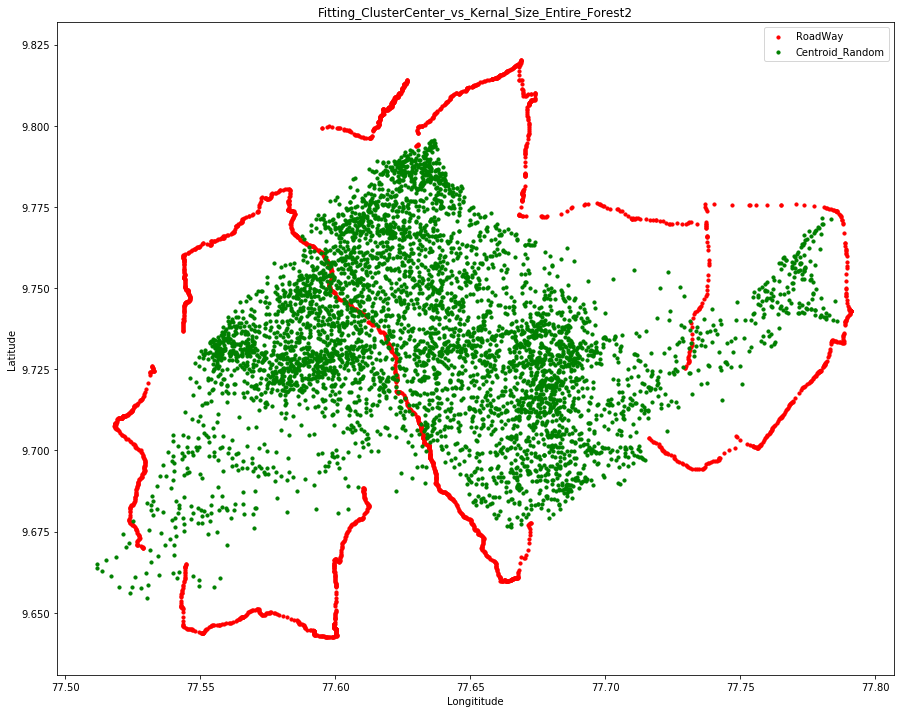

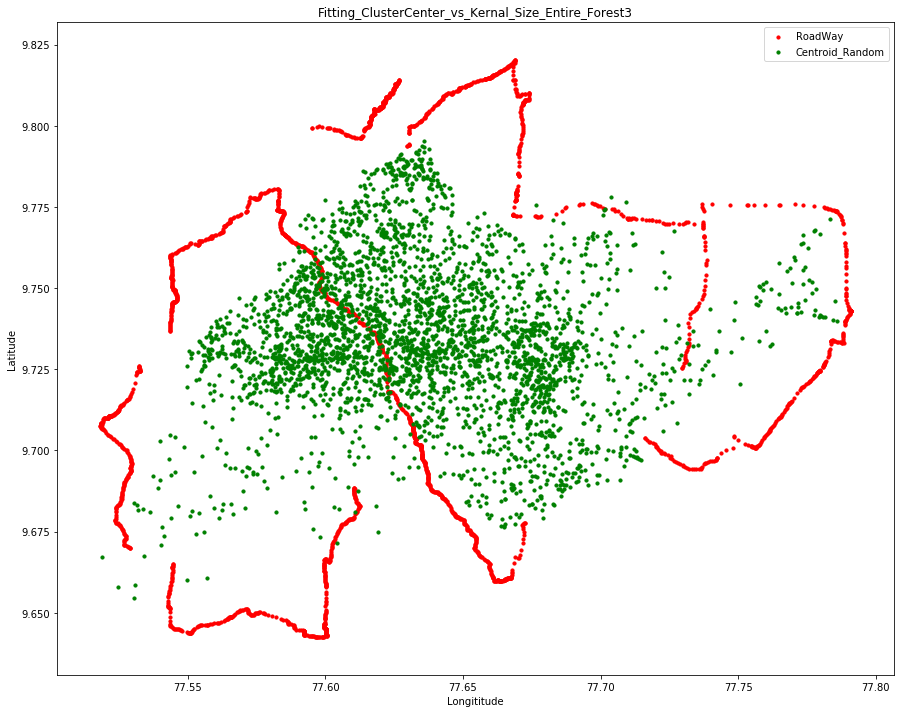

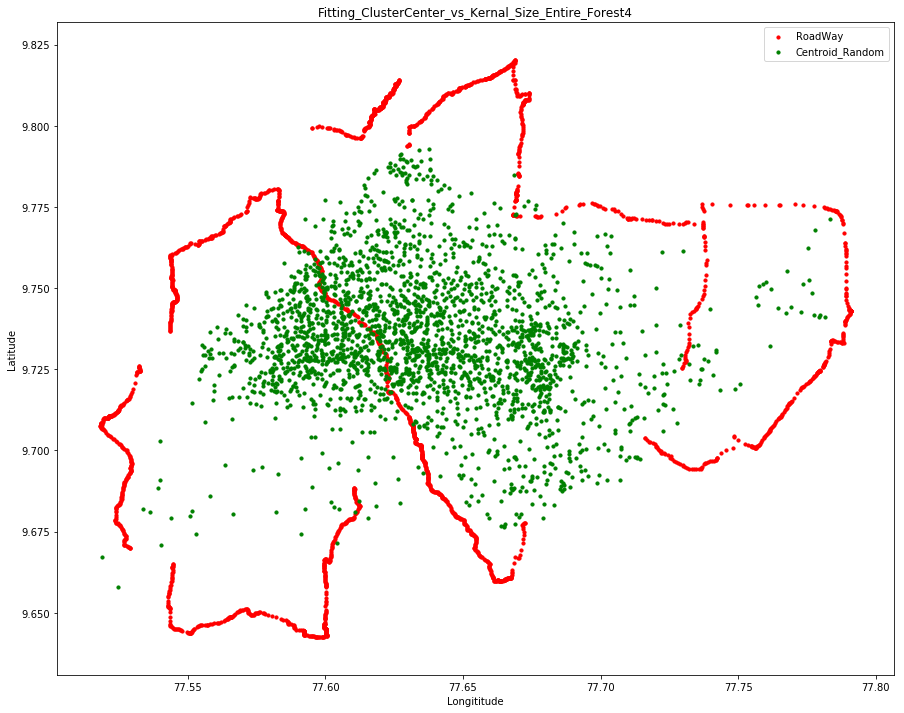

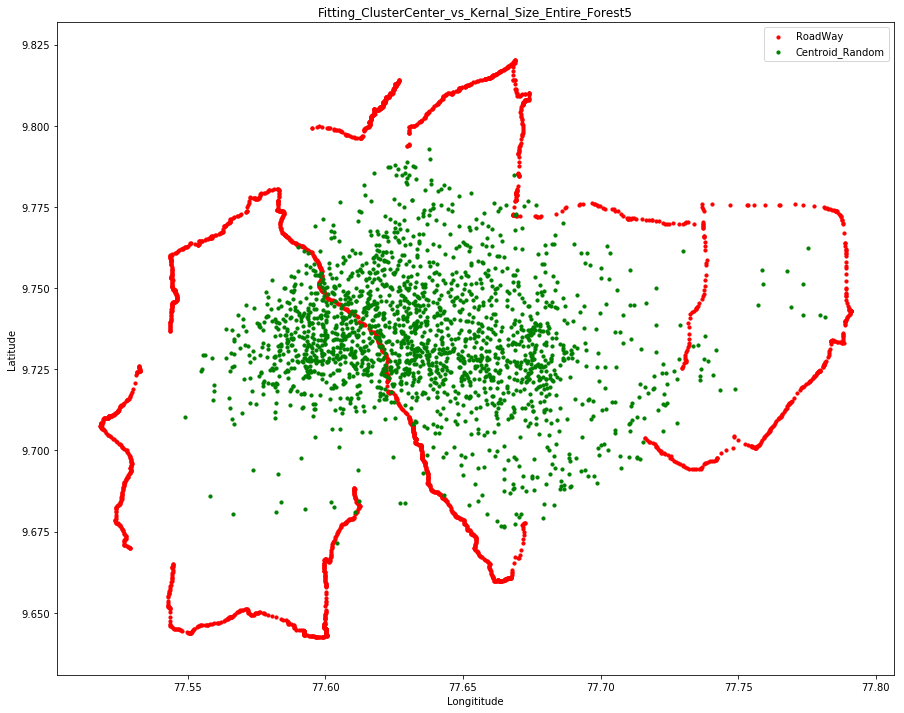

In [26]:
from sklearn.cluster import KMeans   #For K Means Clustering
from sklearn import metrics          #For Metrics Score determination  

kmeans_alt = KMeans(n_clusters=int(Forest_Lat_Lon_Alt.shape[0]),init = 'k-means++', random_state=1).fit(Forest_Lat_Lon_Alt[:,0:3])
center_alt=kmeans_alt.cluster_centers_
labels_alt = kmeans_alt.labels_
for i in range(2,6):
    a = [j for j in center_alt if j in Forest_Lat_Lon_Alt]
    print(i,"Kernal Shape:",center_alt.shape)
    print(i,"True Center counts",len(a))
    kmeans_alt = KMeans(n_clusters=int(Forest_Lat_Lon_Alt.shape[0]/i),init = 'k-means++', random_state=1).fit(center_alt[:,0:3])
    center_alt=kmeans_alt.cluster_centers_
    labels_alt = kmeans_alt.labels_
    Display(count =i,size=10,FileName = "Fitting_ClusterCenter_vs_Kernal_Size_Entire_Forest" + str(i),RoadWay = LAT_LON,Centroid_Random = center_alt)
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration) 

2 Kernal Shape: (9885, 3)
2 True Center counts 9885
3 Kernal Shape: (4943, 3)
3 True Center counts 3027
4 Kernal Shape: (3296, 3)
4 True Center counts 1402
5 Kernal Shape: (2472, 3)
5 True Center counts 742


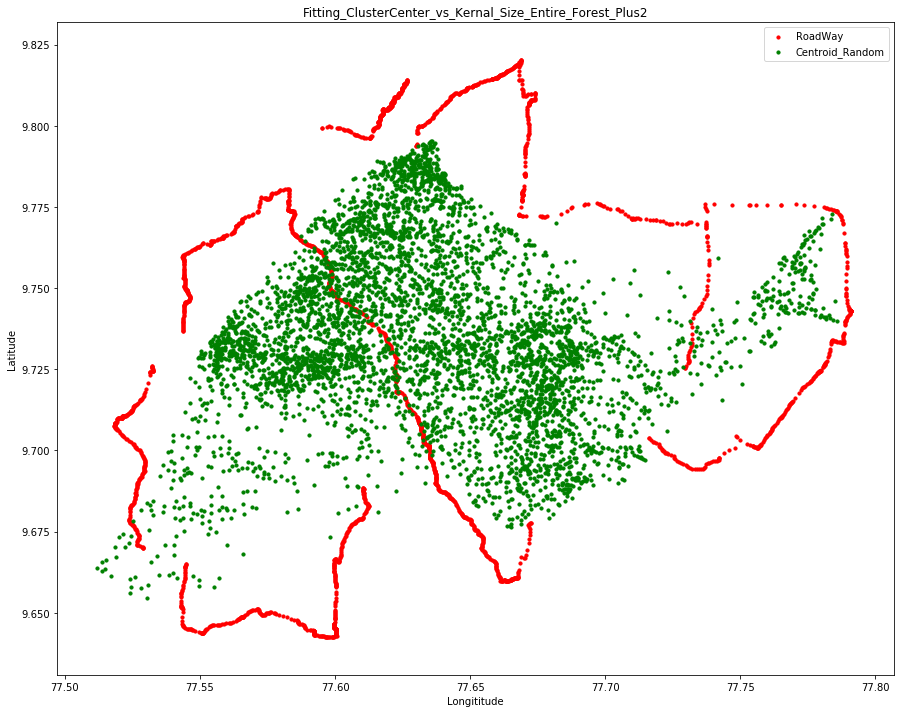

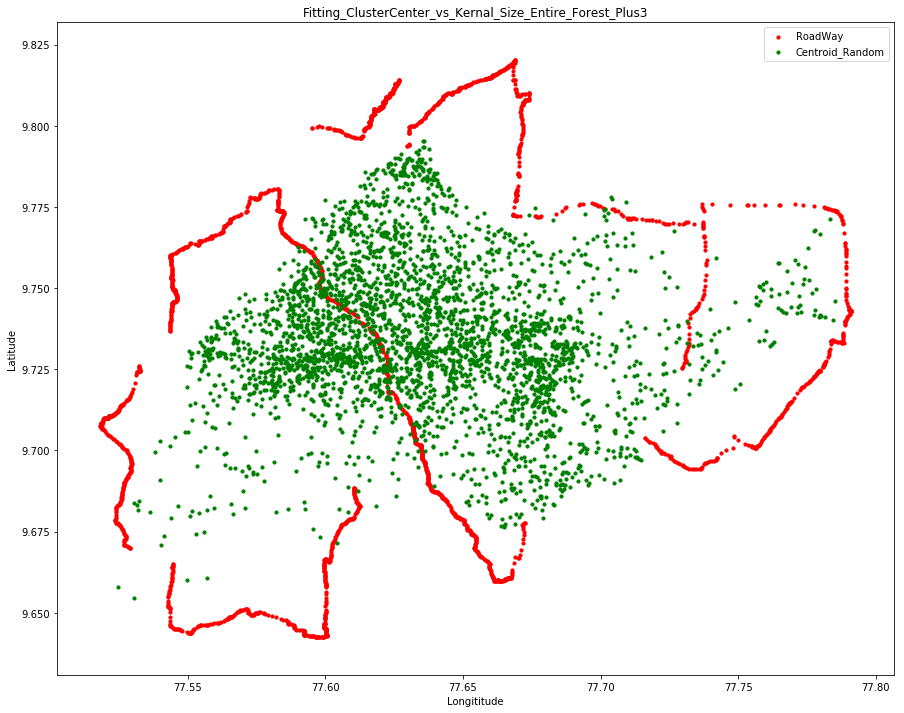

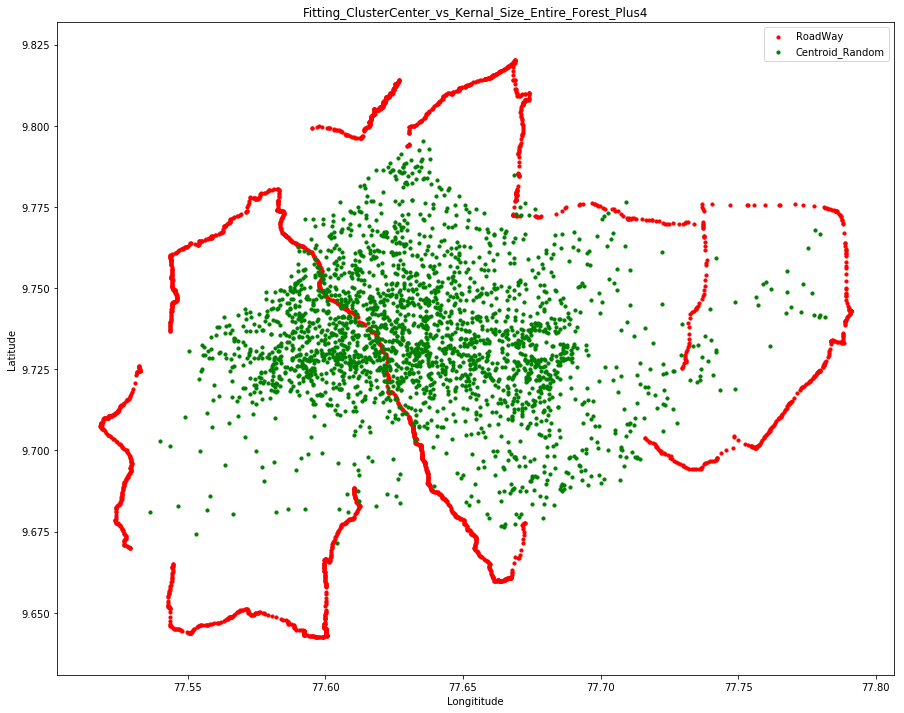

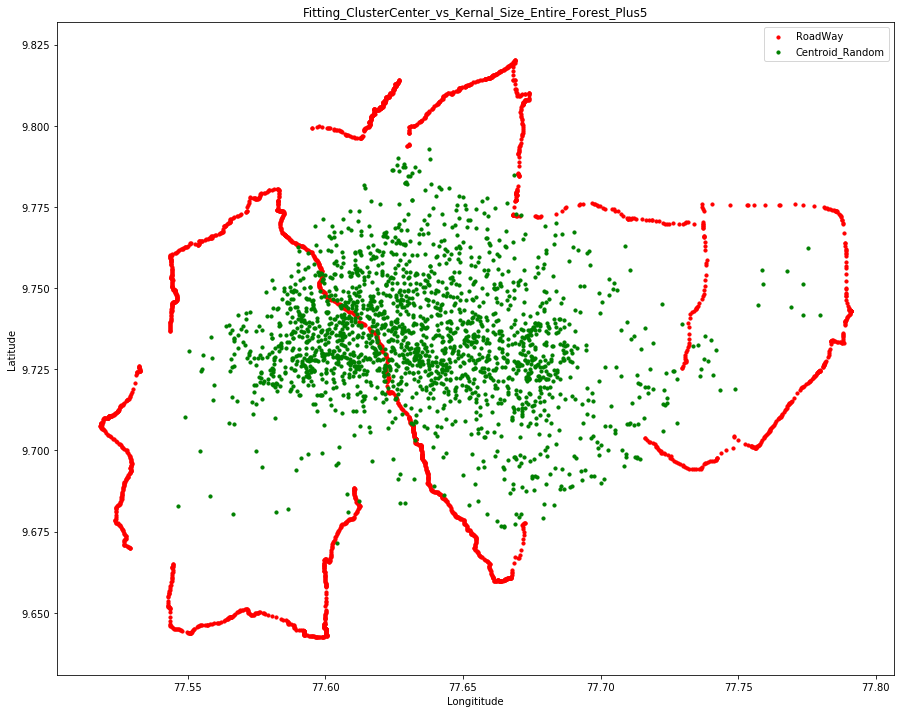

In [27]:
from sklearn.cluster import KMeans   #For K Means Clustering
from sklearn import metrics          #For Metrics Score determination  

kmeans_alt = KMeans(n_clusters=int(Forest_Lat_Lon_Alt.shape[0]),init = 'k-means++', random_state=1).fit(Forest_Lat_Lon_Alt[:,0:3])
center_alt=kmeans_alt.cluster_centers_
labels_alt = kmeans_alt.labels_
for i in range(2,6):
    a = [j for j in center_alt if j in Forest_Lat_Lon_Alt]
    print(i,"Kernal Shape:",center_alt.shape)
    print(i,"True Center counts",len(a))
    kmeans_alt = KMeans(n_clusters=int(Forest_Lat_Lon_Alt.shape[0]/i)+1,init = 'k-means++', random_state=1).fit(center_alt[:,0:3])
    
    center_alt=kmeans_alt.cluster_centers_
    labels_alt = kmeans_alt.labels_
    Display(count =i,size=10,FileName = "Fitting_ClusterCenter_vs_Kernal_Size_Entire_Forest_Plus" + str(i),RoadWay = LAT_LON,Centroid_Random = center_alt)
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)    

### Fitting Cluster with Total Size


# Final Fitting Cluster wrt Kernal size of Entire DatasetDiv by 3 

2 Kernal Shape: (4942, 3)
True Count: (3004, 3)
3 Kernal Shape: (3295, 3)
True Count: (1432, 3)


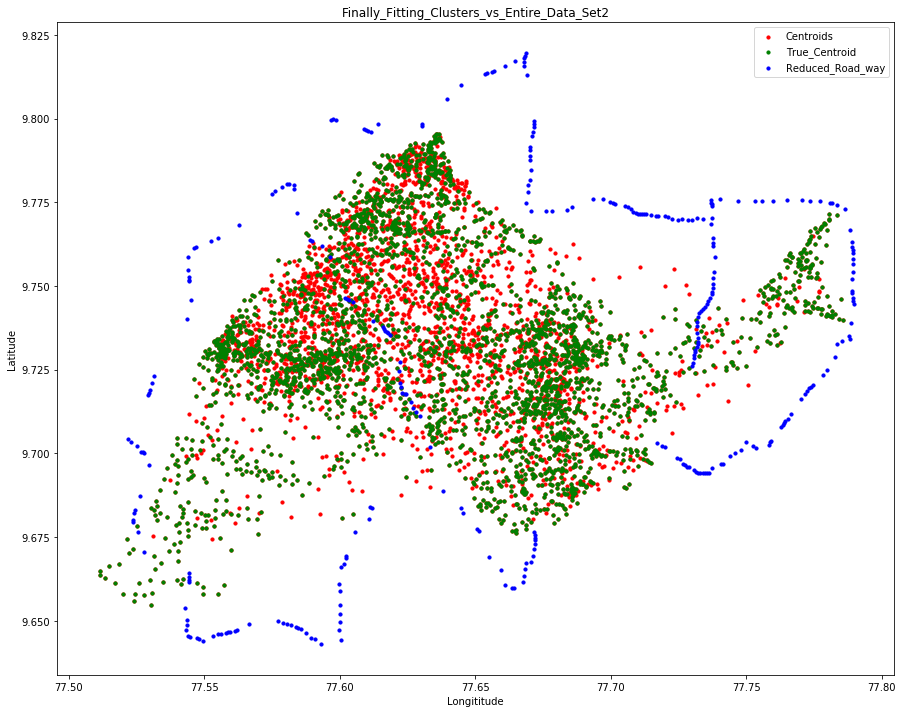

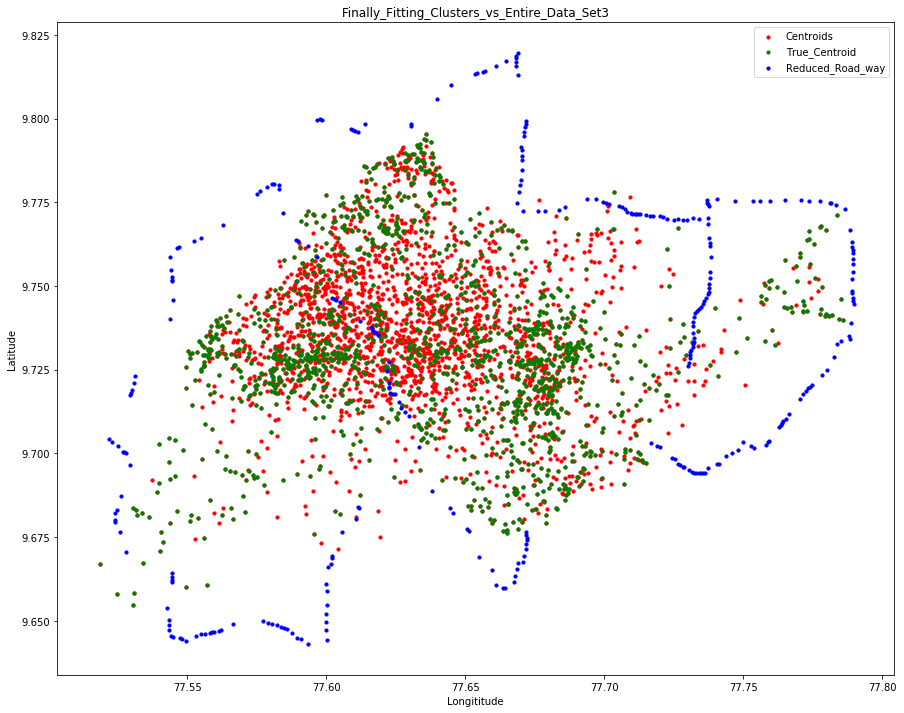

In [13]:
from sklearn.cluster import KMeans   #For K Means Clustering
from sklearn import metrics          #For Metrics Score determination  

kmeans_alt = KMeans(n_clusters=int(Forest_Lat_Lon_Alt.shape[0]),init = 'k-means++', random_state=1).fit(Forest_Lat_Lon_Alt[:,0:3])
center_alt=kmeans_alt.cluster_centers_
labels_alt = kmeans_alt.labels_
True_center_alt = [list(j) for j in center_alt if j in Forest_Lat_Lon_Alt]
True_center_alt = np.array(True_center_alt)
for i in range(2,4):
    kmeans_alt = KMeans(n_clusters=int(Forest_Lat_Lon_Alt.shape[0]/i),init = 'k-means++', random_state=1).fit(center_alt)
    center_alt = kmeans_alt.cluster_centers_
    labels_alt = kmeans_alt.labels_
    True_center_alt = [list(j) for j in center_alt if j in Forest_Lat_Lon_Alt]
    True_center_alt = np.array(True_center_alt)
    print(i,"Kernal Shape:",center_alt.shape)
    print("True Count:",True_center_alt.shape)
    Display(count =i,size=10,FileName = "Finally_Fitting_Clusters_vs_Entire_Data_Set" + str(i),Centroids = center_alt,True_Centroid = True_center_alt,Reduced_Road_way = True_LAT_LON)
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

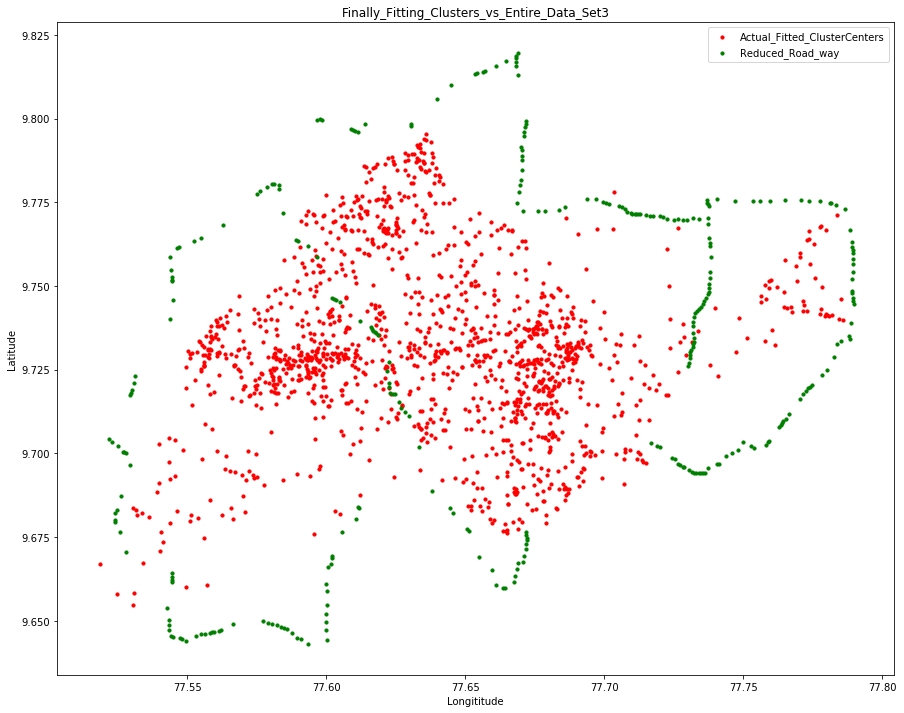

In [30]:
Display(count =3,size=10,FileName = "Finally_Fitting_Clusters_vs_Entire_Data_Set" + str(3),Actual_Fitted_ClusterCenters = True_center_alt,Reduced_Road_way = True_LAT_LON)

### True Center Alt Copy

In [14]:
True_LAT_LON_ALT = True_center_alt.copy()
True_center_alt.shape

(1432, 3)

### Backup

In [15]:
True_center_alt = True_LAT_LON_ALT.copy()
True_center_alt.shape

(1432, 3)

In [16]:
True_center_alt.shape


(1432, 3)

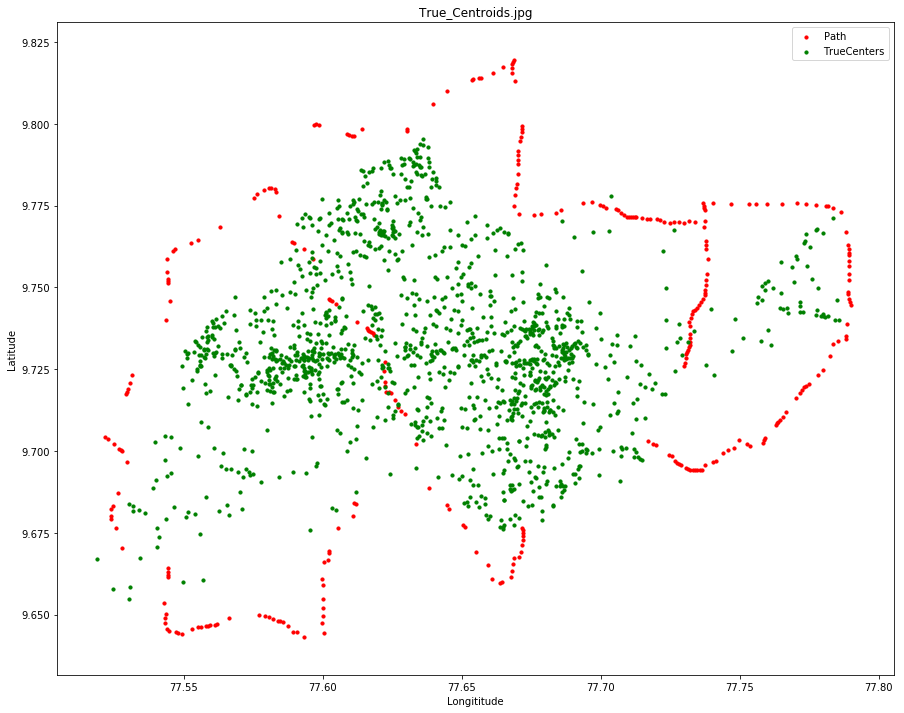

In [14]:
Display(count =1,size =10,FileName ="True_Centroids.jpg",Path = True_LAT_LON,TrueCenters = True_center_alt)

# Law of cosines: 


### d = acos( sin φ1 ⋅ sin φ2 + cos φ1 ⋅ cos φ2 ⋅ cos Δλ ) ⋅ R

# JavaScript: 	

## var φ1 = lat1.toRadians(), φ2 = lat2.toRadians(), Δλ = (lon2-lon1).toRadians(), R = 6371e3; // gives d in metres

### var d = Math.acos( Math.sin(φ1)*Math.sin(φ2) + Math.cos(φ1)*Math.cos(φ2) * Math.cos(Δλ) ) * R;

# Excel: 	

## ACOS( SIN(lat1)*SIN(lat2) + COS(lat1)*COS(lat2)*COS(lon2-lon1) ) * 6371000
(or with lat/lon in degrees): 	=ACOS( SIN(lat1*PI()/180)*SIN(lat2*PI()/180) + COS(lat1*PI()/180)*COS(lat2*PI()/180)*COS(lon2*PI()/180-lon1*PI()/180) ) * 6371000

While simpler, the law of cosines is slightly slower than the haversine, in my tests.

a=LAT_LON[1,:]
b=LAT_LON[3,:]

### LAT = 9.7 LON=77.48 Alt=100
### LAT = 9.73 LON = 77.68 Alt =100

# Test_LAT = float(input())
Test_Lon = float(input())
Test_Alt = float(input())
Unknown_point = np.array([Test_LAT,Test_Lon,Test_Alt])
Path_Distance_Measure = 0

In [17]:
Unknown_point = np.array([9.73,77.68,100])
Unknown_point

array([   9.73,   77.68,  100.  ])

In [18]:
print(type(Unknown_point))
#Test_LAT_LON = Forest_LAT_LON[100,:]
#Test_LAT_LON = a
print(Unknown_point)

<class 'numpy.ndarray'>
[   9.73   77.68  100.  ]


print(a)
print(b)
a = (m.pi*a)/180
b = (m.pi*b)/180
print(a)
print(b)

import math as m

distance = m.acos(m.sin(a[0])*m.sin(b[0])+m.cos(a[0])*m.cos(b[0])*m.cos(a[1]-b[1]))*6378137

print(distance)

z = 0.06320*1000
print(z)

In [19]:
import math as m
def rad(x):
    return ((m.pi*x)/180)

rad(a[0])

### Finding Target Point from Unknow Point

In [20]:
print(type(True_center_alt))
print(type(Unknown_point))
print(Unknown_point)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[   9.73   77.68  100.  ]


### Harversine Distance Formula


In [49]:
def Haversine(CenterLAT_LON_Points,Target_Point):
    R = 6378137
    top = 10
    dLat = rad(CenterLAT_LON_Points[:,0]) - rad(Target_Point[0]);
    dLon = rad(CenterLAT_LON_Points[:,1]) - rad(Target_Point[1]);
    #print(dLat)
    #print(dLon)
    aa = np.sin(dLat / 2) * np.sin(dLat / 2) + np.cos(rad(CenterLAT_LON_Points[:,0]))*np.cos(rad(Target_Point[0]))*np.sin(dLon / 2)*np.sin(dLon / 2);
    c = 2 *np.arctan2(np.sqrt(aa),np.sqrt(1-aa));
    distance = R * c
    #print(distance)
    dis_index = distance.argsort()
    #print(type(CenterLAT_LON_Points))
    distance = np.array([round(float(i),2) for i in distance[dis_index]])
    #return(CenterLAT_LON_Points[dis_index][0],distance[0])
    return(CenterLAT_LON_Points[dis_index][0:top],distance[0:top])

    #print(dis_index)

In [72]:
Target_LAT_LON,Distance = Haversine(True_LAT_LON,Unknown_point)
print("Top 10 Roadway points\n",Target_LAT_LON)
print("Distance in meter\n",np.absolute(Distance))

Top 10 Roadway points
 [[  9.77233  77.67851]
 [  9.77227  77.67602]
 [  9.77273  77.68377]
 [  9.77236  77.6706 ]
 [  9.77362  77.68589]
 [  9.70322  77.71693]
 [  9.77493  77.6687 ]
 [  9.7023   77.71896]
 [  9.77593  77.69366]
 [  9.70194  77.7199 ]]
Distance in meter
 [ 4714.99  4725.69  4774.63  4826.95  4898.57  5030.54  5152.94  5270.88
  5328.01  5378.05]


### Around 10 Km Points

In [23]:
def Top_Around_10KM(distance):
    Around = 10;
    Top = distance[0]
    for i in range(1,distance.shape[0]):
        if(np.abs(Top - distance[i])<Around):
            #Top = np.append(Top,distance[i])
            Top = distance[i]
            #count = i
        else:
            #print(i)
            break
    return(i)
print(Top_Around_10KM(Distance))


1


###  Empty Distance and Point Array

In [24]:
Distance_Array = np.array([])
points = np.array([])


### For Backup TRUE_LAT_LON_ALT

   ### Target_LAT_LON which consists of Top 10 LAT_LON region of the forest
   ### Top_Target_LAT_LON consists of LAT_LON around 10 KM of circle

In [25]:
points= np.array([]) # initial creation

### Pythogorus Theorem


In [26]:
def hypo(x,y):
    return(np.floor(np.sqrt(np.square(x) + np.square(y))))

### Filtering Points Lies between Target and Test Points Quarderants

In [27]:
def Filtering(Test_LAT_LON_Alt,Top_Target_Points,True_Center_alt):
    """Argument 1 Unknown Position, Argument 2 Top Target Points to Reach, Argument 3 True Center Points"""
    #Filter_points = True_Center_alt
    [x,y] = Test_LAT_LON_Alt[0:2] - Top_Target_Points[0]
    if(x>0):
        Filter_points = True_Center_alt[True_Center_alt[:,0]<Test_LAT_LON_Alt[0]]
        #print(Filter_points.shape)
        if(y>0):
            Filter_points = Filter_points[Filter_points[:,1]<Test_LAT_LON_Alt[1]]
        else:
            Filter_points = Filter_points[Filter_points[:,1]>Test_LAT_LON_Alt[1]]
    if(x<0):
        Filter_points = True_Center_alt[True_Center_alt[:,0]>Test_LAT_LON_Alt[0]]
        #print(Filter_points.shape)
        if(y>0):
            Filter_points = Filter_points[Filter_points[:,1]<Test_LAT_LON_Alt[1]]
        else:
            Filter_points = Filter_points[Filter_points[:,1]>Test_LAT_LON_Alt[1]]
    return(Filter_points)

### Filtering Center Points to reach Target LAT LON

In [47]:
Near_LLA,Distance1 = Haversine(True_center_alt,Target_LAT_LON[0])
index = Distance1>Distance[0]
True_center_alt[index]
print(Distance1,Distance)

[   882.73   1261.54   1348.24 ...,  20876.98  21088.76  21148.6 ] [  4714.99   4725.69   4774.63   4826.95   4898.57   5030.54   5152.94
   5270.88   5328.01   5378.05   5467.05   5476.51   5479.14   5484.35
   5490.41   5497.98   5548.72   5573.92   5576.13   5590.24   5626.46
   5628.54   5629.61   5645.3    5650.6    5653.94   5664.52   5699.81
   5710.44   5720.05   5720.38   5731.01   5736.71   5740.16   5774.62
   5775.78   5788.44   5825.42   5843.89   5851.46   5870.28   5907.67
   5931.28   5981.45   5984.62   5993.06   6010.42   6014.74   6027.63
   6081.16   6095.38   6097.77   6103.96   6108.65   6122.09   6151.33
   6176.1    6203.74   6203.81   6231.05   6289.48   6292.32   6296.75
   6310.8    6323.31   6330.14   6380.4    6393.     6396.66   6397.81
   6399.47   6408.08   6412.32   6420.39   6456.14   6464.54   6486.68
   6487.72   6498.64   6502.53   6518.37   6572.05   6585.15   6591.91
   6623.73   6636.67   6639.62   6684.66   6685.52   6712.05   6748.72
   6769.96

[[   9.77018      77.686255    286.43833333]
 [   9.76347      77.67134     267.16      ]
 [   9.76338      77.67023     276.95      ]
 [   9.761345     77.6719      338.41      ]
 [   9.76673      77.66683     251.39      ]
 [   9.76644      77.66666     252.8       ]
 [   9.7654175    77.6904225   322.08      ]
 [   9.7618       77.66904     403.55166667]
 [   9.76688      77.66520667  277.33666667]
 [   9.76828      77.66396     328.84      ]] [   882.73   1261.54   1348.24 ...,  20876.98  21088.76  21148.6 ]


ValueError: operands could not be broadcast together with shapes (10,) (1432,) 

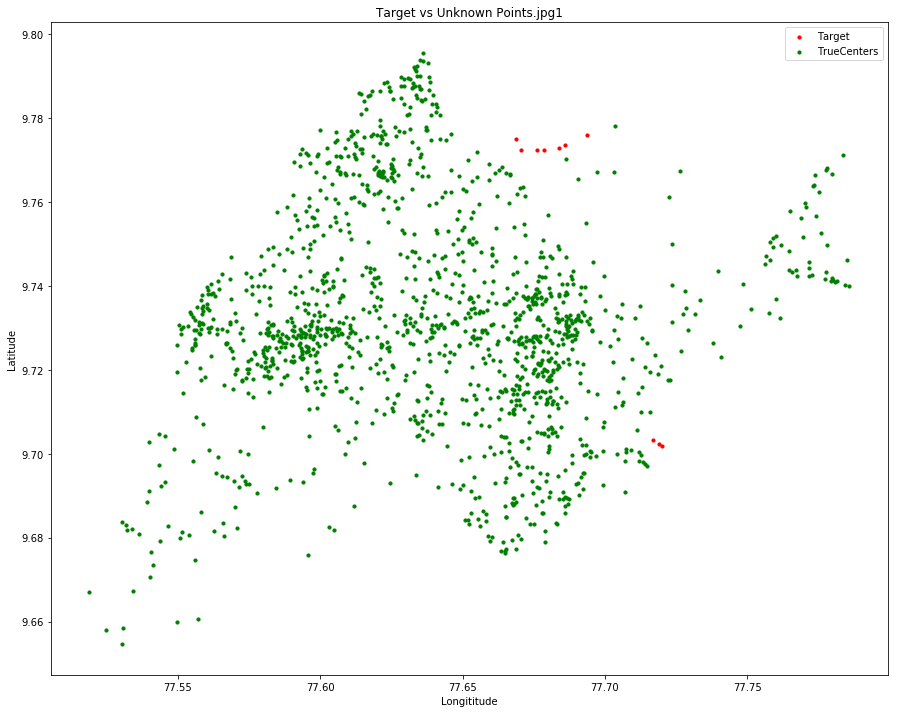

In [48]:
iteration = 1
while(True_center_alt.shape[0]>0):
    #print(iteration)
    Display(count =iteration,size =10,FileName ="Target vs Unknown Points.jpg" + str(iteration),Target = Target_LAT_LON,TrueCenters = True_center_alt)
    #print(Target_LAT_LON)
    Near_LLA,Distance = Haversine(True_center_alt,Target_LAT_LON[0])
    print(Near_LLA,Distance)
    min_Distance = hypo(Near_LLA[:,2],Distance)
    points = np.append(points,Unknown_point)
    Unknown_point = Near_LLA[min_Distance.argsort(axis =0)[0]]
    print(Unknown_point)
    True_center_alt = Filtering(Unknown_point,Target_LAT_LON,True_center_alt)
    iteration +=1
points = np.append(points,Unknown_point)
print(points)

In [79]:
print(Unknown_point)
print(iteration)
points = points.reshape(int(points.shape[0]/3),3)


[   9.77194   77.65498  359.53   ]
3


ValueError: cannot reshape array of size 9 into shape (1,3)

In [80]:
print(Unknown_point)
print(points)
print(Target_LAT_LON)

[   9.77194   77.65498  359.53   ]
[[   9.73         77.68        100.        ]
 [   9.77018      77.686255    286.43833333]
 [   9.77194      77.65498     359.53      ]]
[[  9.77233  77.67851]
 [  9.77227  77.67602]
 [  9.77273  77.68377]
 [  9.77236  77.6706 ]
 [  9.77362  77.68589]
 [  9.70322  77.71693]
 [  9.77493  77.6687 ]
 [  9.7023   77.71896]
 [  9.77593  77.69366]
 [  9.70194  77.7199 ]]


[ 9.73     9.77018  9.77194  9.77233]
[ 77.68      77.686255  77.65498   77.67851 ]
(1432, 3)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


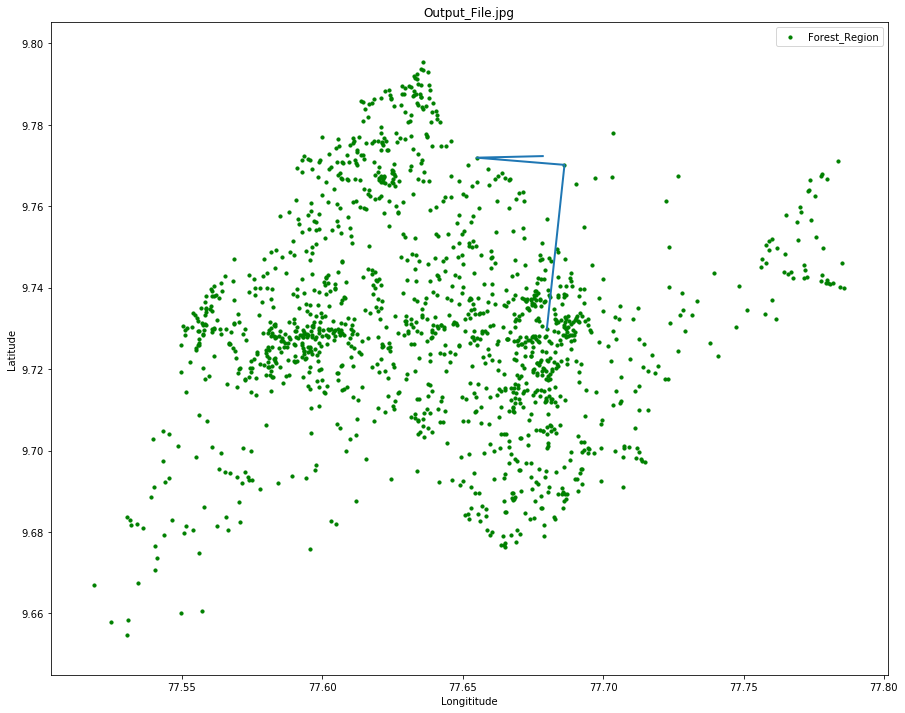

In [106]:
line_points_Lat = np.array([])
line_points_Lon = np.array([])
line_points_Lat = np.append(line_points_Lat,points[:,0])
line_points_Lat = np.append(line_points_Lat,Target_LAT_LON[0,0])
print(line_points_Lat)
line_points_Lon = np.append(line_points_Lon,points[:,1])
line_points_Lon = np.append(line_points_Lon,Target_LAT_LON[0,1])
print(line_points_Lon)
True_center_alt = True_LAT_LON_ALT.copy()#Back up
print(True_center_alt.shape)
import matplotlib.pyplot as plt

Display(count=1,size = 10, FileName = "Output_File.jpg",RoadWay = True_LAT_LON,Forest_Region = True_center_alt)
plt.hold(True)
#fig1 = plt.figure(1, figsize=(15,12))
#ax = fig1.add_subplot(111)
plt.plot(line_points_Lon,line_points_Lat,'-',linewidth=2)
plt.hold(False)

In [55]:
import matplotlib.pyplot as plt
#Point1 = center[distan.argsort()[i],:]
#Point1_1 = center[distan.argsort()[:1],1]
#print(Point1)
#Point2 = np.array([Test_LAT_LON])
#Point2 = Point2.reshape(1,2)
#print(Point2)
#Point2_1 = Test_LAT_LON[1]
#print(Point1)
print(Point2)
fig1 = plt.figure(1, figsize=(15,12))
ax = fig1.add_subplot(111)
ax.scatter(center[:,1],center[:,0],label = 'Centroids',color = 'r',s=10)
# ax.scatter(LAT_LON[:,0],LAT_LON[:,1],label = 'Forest',color = 'y',s=2)
#ax.add_line(Line2D(Point1,Point2),linestyle ='-')
plt.plot(Point1[1],Point1[0],'r*')
plt.plot(Point2[0][1],Point2[0][0],'g*')
pt1 =[]
pt2 =[]
pt1.append(Point1[1])
pt1.append(Point2[0][1])
pt2.append(Point1[0])
pt2.append(Point2[0][0])
plt.plot(pt1,pt2,'--', linewidth=2)
plt.xlabel('Longititude')
plt.ylabel('Latitude')
plt.title('ROUTE DATASET')
plt.legend()

NameError: name 'Point2' is not defined

In [ ]:
#Top_Target_LAT_LON = np.array([])

Top_Target_LAT_LON,Distance = Haversine(True_LAT_LON,Test_LAT_LON_Alt)
print(Top_Target_LAT_LON,"\n\n",Distance)


### Top 10 Minimum Distance to Target Points 

In [ ]:
True_Center_alt.shape

In [ ]:
Test_LAT_LON_Alt

In [ ]:
Filter_points = Filtering(Test_LAT_LON_Alt,Top_Target_Points,True_Center_alt)
#print(Filter_points)
#print(Test_LAT_LON_Alt)
[Path_coordinate,distance] = Haversine(Filter_points,Test_LAT_LON_Alt[0:2])
Path_coordinate = np.array(Path_coordinate)
distance = np.array(distance)
points = np.append(points,Path_coordinate,axis=0)
print(Path_coordinate)
print(distance)


In [ ]:
print(Filter_points.shape)

#Filter_points = np.reshape(Filter_points,38,3)
Filter_points = Filter_points[Filter_points != Path_coordinate]

Filter_points = np.reshape(x,(int(np.count_nonzero(x)/3),3))
Filter_points.shape
True_Center_alt = Filter_points

In [ ]:
Filter_points = Filtering(Test_LAT_LON_Alt,Top_Target_Points,True_Center_alt)
Filter_points.shape

In [ ]:
x = np.delete(Filter_points,index)
print(x)
Filter_points

In [ ]:
Test_LAT_LON_Alt = Path_coordinate


In [ ]:
y = np.reshape(x,(-1,3))
y

In [ ]:
Path_Distance_Measure = Path_Distance_Measure + hypo(Path_coordinate[2],distance)
Distance_Array = np.append(Distance_Array,np.array(Path_Distance_Measure))
Distance_Array

In [ ]:
Distance_Array

In [ ]:
print((distance.argsort()[1]))
Point1 = center[distance.argsort()[1],:]
#Point1_1 = center[distan.argsort()[:1],1]
print(Point1)
Point2 = np.array([Test_LAT_LON])
Point2 = Point2.reshape(1,2)
#print(Point2)
#Point2_1 = Test_LAT_LON[1]
print(Point1)
print(Point2)


In [ ]:
LAT_LON[:,1]
center[:,0]

In [ ]:
import matplotlib.pyplot as plt
for i in range(1):
    Point1 = center[distan.argsort()[i],:]
    #Point1_1 = center[distan.argsort()[:1],1]
    print(Point1)
    Point2 = np.array([Test_LAT_LON])
    Point2 = Point2.reshape(1,2)
    #print(Point2)
    #Point2_1 = Test_LAT_LON[1]
    #print(Point1)
    print(Point2)
    fig1 = plt.figure(1, figsize=(15,12))
    ax = fig1.add_subplot(111)
    ax.scatter(center[:,1],center[:,0],label = 'Centroids',color = 'r',s=10)
   # ax.scatter(LAT_LON[:,0],LAT_LON[:,1],label = 'Forest',color = 'y',s=2)
    #ax.add_line(Line2D(Point1,Point2),linestyle ='-')
    plt.plot(Point1[1],Point1[0],'r*')
    plt.plot(Point2[0][1],Point2[0][0],'g*')
    pt1 =[]
    pt2 =[]
    pt1.append(Point1[1])
    pt1.append(Point2[0][1])
    pt2.append(Point1[0])
    pt2.append(Point2[0][0])
    plt.plot(pt1,pt2,'--', linewidth=2)
    plt.xlabel('Longititude')
    plt.ylabel('Latitude')
    plt.title('ROUTE DATASET')
    plt.legend()

line1 = [(center[distan.argsort()[:1],:]), (Test_LAT_LON)]
print(line1)
(line1_xs, line1_ys) = zip(*line1)
print(line1_xs)
print(line1_ys)
line1

center[distan.argsort()[:1],:].shape

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
r = np.arange(0,1,0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.show()